In [1]:
# Purpose of the code:
    # Compare the clinical data to device measurements

In [2]:
# necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
from scipy import stats
%matplotlib inline

In [3]:
# switch to a proper directory to access the data
pwd

'/camhpc/home/nhassanp/jupyter-notebook-dir'

In [4]:
cd /camdatalake/bronze/verily_ms/device/

/camdatalake/bronze/verily_ms/device


In [5]:
pwd

'/camdatalake/bronze/verily_ms/device'

In [6]:
# download and read the data

# FeatureDay: Average value of the features for each day of study. Days are listed as 
# DayOfStudy

# FeatureStudy: Features for the entire study period.For the at home features, 
# the reported value is the median of the observed day level values.

import gzip, csv
with gzip.open("FeaturesDay.csv.gz", "rt", newline="") as file:
    FeatureDay = pd.read_csv(file, header = 0)

with gzip.open("FeaturesStudy.csv.gz", "rt", newline="") as file:
    FeatureStudy = pd.read_csv(file, header = 0)

In [7]:
# exploring the dataset
FeatureDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Columns: 217 entries, user_email to demographic_model_error_3
dtypes: float64(212), int64(3), object(2)
memory usage: 2.5+ MB


In [8]:
FeatureDay.describe()

/opt/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


msfc_walk_composite_1  msfc_9hpt_composite_1  msfc_sdmt_composite_1  \
count            1532.000000            1532.000000            1532.000000   
mean               -0.019921               0.090237               0.144536   
std                 1.003682               0.953135               0.862097   
min                -3.221528              -1.886624              -2.159982   
25%                -0.256647              -0.645806              -0.411009   
50%                 0.299268               0.104155               0.135545   
75%                 0.669878               0.940655               0.900721   
max                 0.924672               1.897517               1.939174   

       msfc_snellen_composite_1  msfc_composite_1  \
count               1532.000000       1532.000000   
mean                   0.039580          0.063608   
std                    1.015171          0.763705   
min                   -2.556372         -1.373281   
25%                   -0.416552         -0.398860   
50%                    0.296722          0.345561   
75%                    1.295305          0.642663   
max                    1.295305          1.137124   

       msfc_walk_composite_residual_1  msfc_9hpt_composite_residual_1  \
count                     1532.000000                     1532.000000   
mean                        -0.080672                        0.030814   
std                          0.820543                        0.894932   
min                         -3.038226                       -1.545838   
25%                         -0.201410                       -0.680438   
50%                          0.038386                        0.180416   
75%                          0.301486                        0.790244   
max                          1.463065                        1.543403   

       msfc_sdmt_composite_residual_1  msfc_snellen_composite_residual_1  \
count                     1532.000000                        1532.000000   
mean                         0.128497                          -0.036285   
std                          0.785066                           1.075377   
min                         -1.801496                          -2.351975   
25%                         -0.321350                          -0.802429   
50%                          0.138712                          -0.257036   
75%                          0.656998                           0.807599   
max                          2.247295                           1.817092   

       msfc_walk_composite_2            ...              \
count            1530.000000            ...               
mean                0.039871            ...               
std                 0.776117            ...               
min                -2.248677            ...               
25%                      NaN            ...               
50%                      NaN            ...               
75%                      NaN            ...               
max                 0.924672            ...               

       hourly_temp_median_at_home  hourly_temp_std_at_home  \
count                 1285.000000              1285.000000   
mean                    29.650973                 0.726677   
std                      2.929483                 0.786577   
min                     16.700000                 0.000000   
25%                           NaN                      NaN   
50%                           NaN                      NaN   
75%                           NaN                      NaN   
max                     33.600000                 6.860394   

       hourly_temp_range_at_home  hourly_amb_temp_median_at_home  \
count               1.285000e+03                     1285.000000   
mean                1.766848e+00                       25.396385   
std                 1.732030e+00                        2.653647   
min                -3.552714e-15                       16.185000   
25%                          NaN                    

In [9]:
FeatureDay.head()

user_email gls_subject_code  msfc_walk_composite_1  \
0  gmssm001@glsstudykit.com          H800001              -0.187158   
1  gmssm001@glsstudykit.com          H800001              -0.187158   
2  gmssm001@glsstudykit.com          H800001              -0.187158   
3  gmssm001@glsstudykit.com          H800001              -0.187158   
4  gmssm001@glsstudykit.com          H800001              -0.187158   

   msfc_9hpt_composite_1  msfc_sdmt_composite_1  msfc_snellen_composite_1  \
0              -1.886624              -1.285495                 -1.486462   
1              -1.886624              -1.285495                 -1.486462   
2              -1.886624              -1.285495                 -1.486462   
3              -1.886624              -1.285495                 -1.486462   
4              -1.886624              -1.285495                 -1.486462   

   msfc_composite_1  msfc_walk_composite_residual_1  \
0         -1.211435                        1.035492   
1         -1.211435                        1.035492   
2         -1.211435                        1.035492   
3         -1.211435                        1.035492   
4         -1.211435                        1.035492   

   msfc_9hpt_composite_residual_1  msfc_sdmt_composite_residual_1  \
0                       -1.545838                        0.138712   
1                       -1.545838                        0.138712   
2                       -1.545838                        0.138712   
3                       -1.545838                        0.138712   
4                       -1.545838                        0.138712   

             ...              hourly_temp_median_at_home  \
0            ...                                   32.70   
1            ...                                   32.85   
2            ...                                   31.60   
3            ...                                   30.75   
4            ...                                   30.65   

   hourly_temp_std_at_home  hourly_temp_range_at_home  \
0                 0.760989                      1.905   
1                 0.532629                      1.350   
2                 0.717705                      1.800   
3                 1.689474                      5.550   
4                 0.830880                      2.205   

   hourly_amb_temp_median_at_home  hourly_amb_temp_std_at_home  \
0                         30.7575                     4.330252   
1                         29.5875                     6.815948   
2                         30.2200                     3.545528   
3                         27.3600                     4.984148   
4                         30.6825                     4.699070   

   hourly_amb_temp_range_at_home   prv_sdnn  demographic_model_error_1  \
0                        11.7550  26.824533                  -0.924262   
1                        15.8120  24.795007                  -0.924262   
2                         7.3300  28.387662                  -0.924262   
3                        13.5820  31.598062                  -0.924262   
4                        13.8555  23.523694                  -0.924262   

   demographic_model_error_2  demographic_model_error_3  
0                   -1.03338                  -1.525646  
1                   -1.03338                  -1.525646  
2                   -1.03338                  -1.525646  
3                   -1.03338                  -1.525646  
4                   -1.03338                  -1.525646  

[5 rows x 217 columns]

In [10]:
# extracting list of feature names in the dataset
list(FeatureDay.columns)

['user_email',
 'gls_subject_code',
 'msfc_walk_composite_1',
 'msfc_9hpt_composite_1',
 'msfc_sdmt_composite_1',
 'msfc_snellen_composite_1',
 'msfc_composite_1',
 'msfc_walk_composite_residual_1',
 'msfc_9hpt_composite_residual_1',
 'msfc_sdmt_composite_residual_1',
 'msfc_snellen_composite_residual_1',
 'msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_residual_2',
 'msfc_9hpt_composite_residual_2',
 'msfc_sdmt_composite_residual_2',
 'msfc_snellen_composite_residual_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3',
 'msfc_walk_composite_residual_3',
 'msfc_9hpt_composite_residual_3',
 'msfc_sdmt_composite_residual_3',
 'msfc_snellen_composite_residual_3',
 'sex',
 'height_inch',
 'weight_lbs',
 'bmi',
 'age_years',
 'dayofstudy',
 'movement_rate',
 'duration_movement_count',
 'stance',
 'swing',
 'turn_a

In [11]:
# found list of unique IDs for patients
patient_IDs = list(FeatureDay['gls_subject_code'].unique())
patient_IDs

['H800001',
 'H800002',
 'H800003',
 'H800004',
 'H800006',
 'H800007',
 'H800008',
 'H800009',
 'H800010',
 'H800011',
 'H800013',
 'H800014',
 'H800016',
 'H800017',
 'H800018',
 'H800019',
 'H800020',
 'H800021',
 'H800022',
 'H800023',
 'H800024',
 'H800025',
 'H800005',
 'H800012',
 'H800015']

In [12]:
# 10 free-living features with high correlation to MSFC

# ['idle_minutes',
#  'turn_vel_std_ankle',
#  'swing',
#  'stance',
#  'duration_movement_count',
#  'turn_vel_max_ankle',
#  'turn_duration_ankle',
#  'duration_rem_count',
#  'rem_percent',
#  'movement_rate']

free_living_features_highly_correlated = ['idle_minutes',
 'turn_vel_std_ankle',
 'swing',
 'stance',
 'duration_movement_count',
 'turn_vel_max_ankle',
 'turn_duration_ankle',
 'duration_rem_count',
 'rem_percent',
 'movement_rate']

In [13]:
# 19 highly correlated at home features (structured activity) to MSFC

# ['mean_pvt_delay_7_at_home',
#  'mobility_stance_at_home',
#  'mean_pvt_delay_at_home',
#  'pq_nondominant_rhythm_at_home',
#  'pq_nondominant_median_at_home',
#  'pq_dominant_rhythm_at_home',
#  'turn_vel_max_at_home',
#  'mobility_swing_at_home',
#  'zx_dominant_num_correct_at_home',
#  'turn_vel_std_at_home',
#  'turn_duration_ankle_at_home',
#  'turn_vel_max_ankle_at_home',
#  'mean_pvt_delay_5_at_home',
#  'zx_nondominant_median_at_home',
#  'zx_nondominant_num_correct_at_home',
#  'mean_pvt_delay_3_at_home',
#  'turn_vel_std_ankle_at_home',
#  'mobility_activity_at_home_time',
#  'mean_pvt_delay_1_at_home']

at_home_features_highly_correlated = ['mean_pvt_delay_7_at_home',
 'mobility_stance_at_home',
 'mean_pvt_delay_at_home',
 'pq_nondominant_rhythm_at_home',
 'pq_nondominant_median_at_home',
 'pq_dominant_rhythm_at_home',
 'turn_vel_max_at_home',
 'mobility_swing_at_home',
 'zx_dominant_num_correct_at_home',
 'turn_vel_std_at_home',
 'turn_duration_ankle_at_home',
 'turn_vel_max_ankle_at_home',
 'mean_pvt_delay_5_at_home',
 'zx_nondominant_median_at_home',
 'zx_nondominant_num_correct_at_home',
 'mean_pvt_delay_3_at_home',
 'turn_vel_std_ankle_at_home',
 'mobility_activity_at_home_time',
 'mean_pvt_delay_1_at_home']

In [14]:
# check the content of the directory
ls

FeaturesDay.csv.gz                     tree_10.dot  tree_26.dot  tree_41.dot
FeaturesStudy.csv.gz                   tree_11.dot  tree_27.dot  tree_42.dot
FeatureStudy_at_home_related           tree_12.dot  tree_28.dot  tree_43.dot
FeatureStudy_clinical_1_related        tree_13.dot  tree_29.dot  tree_44.dot
FeatureStudy_clinical_2_related        tree_14.dot  tree_2.dot   tree_45.dot
FeatureStudy_clinical_3_related        tree_15.dot  tree_30.dot  tree_46.dot
FeatureStudy_clinical_related          tree_16.dot  tree_31.dot  tree_47.dot
FeatureStudy_demographics_related      tree_17.dot  tree_32.dot  tree_48.dot
FeatureStudy_free_living_related       tree_18.dot  tree_33.dot  tree_49.dot
FeatureStudy_model_related             tree_19.dot  tree_34.dot  tree_4.dot
FeatureStudy_MSFC_composite_related    tree_1.dot   tree_35.dot  tree_50.dot
FeatureStudy_MSFC_related              tree_20.dot  tree_36.dot  tree_5.dot
FeatureStudy_patient_info_related      tree_21.dot  tree_37.dot  tree_6.dot
GM

In [15]:
# extract part of the FeatureDay realted to clinical visit_3
FeatureStudy_clinical_3_related = pd.read_csv('FeatureStudy_clinical_3_related')
clinical_3_related_col_names = list(FeatureStudy_clinical_3_related.columns)
FeatureDay_clinical_3_related = FeatureDay[['gls_subject_code','dayofstudy'] + clinical_3_related_col_names]
FeatureDay_clinical_3_related.isnull().sum().sum()

60514

In [16]:
# extract part of the FeatureDay realted to clinical visit_2
FeatureStudy_clinical_2_related = pd.read_csv('FeatureStudy_clinical_2_related')
clinical_2_related_col_names = list(FeatureStudy_clinical_2_related.columns)
FeatureDay_clinical_2_related = FeatureDay[['gls_subject_code','dayofstudy'] + clinical_2_related_col_names]
FeatureDay_clinical_2_related.isnull().sum().sum()

60367

In [17]:
# extract part of the FeatureDay realted to clinical visit_1
FeatureStudy_clinical_1_related = pd.read_csv('FeatureStudy_clinical_1_related')
clinical_1_related_col_names = list(FeatureStudy_clinical_1_related.columns)
FeatureDay_clinical_1_related = FeatureDay[['gls_subject_code','dayofstudy'] + clinical_1_related_col_names]
FeatureDay_clinical_1_related.isnull().sum().sum()

58797

In [18]:
# extract part of the FeatureDay realted to all clinical visits
FeatureStudy_clinical_related = pd.read_csv('FeatureStudy_clinical_related')
clinical_related_col_names = list(FeatureStudy_clinical_related.columns)
FeatureDay_clinical_related = FeatureDay[['gls_subject_code','dayofstudy'] + clinical_related_col_names]
FeatureDay_clinical_related.isnull().sum().sum()

179678

In [19]:
# extract part of the FeatureStudy realted to clinical visits
FeatureStudy_columns_names = list(FeatureStudy.columns)
FeatureStudy_clinical_1_col_names = []
FeatureStudy_clinical_2_col_names = []
FeatureStudy_clinical_3_col_names = []
FeatureStudy_clinical_col_names = []
for name in FeatureStudy_columns_names:
    name_lower = name.lower()
    if 'clinic_1' in name_lower:
        FeatureStudy_clinical_1_col_names.append(name)
        FeatureStudy_clinical_col_names.append(name)
    if 'clinic_2' in name_lower:
        FeatureStudy_clinical_2_col_names.append(name)
        FeatureStudy_clinical_col_names.append(name)
    if 'clinic_3' in name_lower:
        FeatureStudy_clinical_3_col_names.append(name)
        FeatureStudy_clinical_col_names.append(name)
 
FeatureStudy_clinical_1_related = FeatureStudy[['gls_subject_code'] + FeatureStudy_clinical_1_col_names]
FeatureStudy_clinical_2_related = FeatureStudy[['gls_subject_code'] + FeatureStudy_clinical_2_col_names]
FeatureStudy_clinical_3_related = FeatureStudy[['gls_subject_code'] + FeatureStudy_clinical_3_col_names]

# extract all clinical data
FeatureStudy_clinical_related = pd.concat([FeatureStudy_clinical_1_related,
                                          FeatureStudy_clinical_2_related,
                                          FeatureStudy_clinical_3_related],axis = 1)

print(FeatureStudy_clinical_1_related.shape)
print(FeatureStudy_clinical_2_related.shape)
print(FeatureStudy_clinical_3_related.shape)
print(FeatureStudy_clinical_related.shape)

(25, 40)
(25, 41)
(25, 41)
(25, 122)


In [20]:
FeatureStudy_clinical_1_related.head()

gls_subject_code  mean_pvt_delay_1_clinic_1  mean_pvt_delay_3_clinic_1  \
0          H800012                     1420.5                 896.500000   
1          H800015                      449.5                 447.666667   
2          H800005                     1594.0                 815.500000   
3          H800009                      877.0                 761.666667   
4          H800014                      404.5                 354.000000   

   mean_pvt_delay_5_clinic_1  mean_pvt_delay_7_clinic_1  \
0                      762.9                 690.214286   
1                      408.1                 407.642857   
2                      681.1                 609.571429   
3                      760.3                 789.357143   
4                      346.5                 350.357143   

   mean_pvt_delay_clinic_1  pq_nondominant_median_clinic_1  \
0               567.486923                           695.0   
1               377.157407                           880.0   
2               494.697857                           625.0   
3               886.812500                           955.0   
4               358.807692                           513.0   

   pq_dominant_median_clinic_1  zx_nondominant_median_clinic_1  \
0                        617.0                           345.0   
1                        799.0                           665.0   
2                        494.0                           377.5   
3                        898.0                           531.0   
4                        463.0                           531.0   

   zx_dominant_median_clinic_1               ...                \
0                        330.0               ...                 
1                        445.0               ...                 
2                        354.0               ...                 
3                        426.5               ...                 
4                        562.0               ...                 

   sway_disp_lr_clinic_1  sway_disp_ap_clinic_1  \
0             144.590276             157.374374   
1             170.491984             206.068209   
2             142.119218             143.942393   
3             154.904393             188.567557   
4             156.717298             162.092820   

   mobility_activity_clinic_1_time  hrv_sdnn_clinic_1  \
0                          22740.0                NaN   
1                          23230.0          85.329493   
2                          24840.0          11.148692   
3                          31040.0                NaN   
4                          21250.0          45.366341   

   hourly_temp_median_clinic_1  hourly_temp_std_clinic_1  \
0                       27.450                  1.143304   
1                       30.500                  0.658298   
2                       29.625                  1.136913   
3                       33.450                  1.483319   
4                       30.575                  1.617717   

   hourly_temp_range_clinic_1  hourly_amb_temp_median_clinic_1  \
0                       2.550                          25.8550   
1                       1.400                          26.0800   
2                       2.550                          26.8675   
3                       3.000                          25.8875   
4                       3.255                          27.1150   

   hourly_amb_temp_std_clinic_1  hourly_amb_temp_range_clinic_1  
0                      2.290030                          6.2080  
1                      2.240922                          6.0700  
2                      2.201386                          5.7820  
3                      3.329655                          9.3795  
4                      2.011955                          5.8365  

[5 rows x 40 columns]

In [21]:
FeatureStudy_clinical_2_related.head()

gls_subject_code  mean_pvt_delay_1_clinic_2  mean_pvt_delay_3_clinic_2  \
0          H800012                        NaN                        NaN   
1          H800015                        NaN                        NaN   
2          H800005                      825.5                 604.000000   
3          H800009                     2193.0                1179.333333   
4          H800014                      364.5                 352.333333   

   mean_pvt_delay_5_clinic_2  mean_pvt_delay_7_clinic_2  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                      717.4                 649.428571   
3                     1234.5                1084.285714   
4                      428.3                 398.571429   

   mean_pvt_delay_clinic_2  fatigue_level_clinic_2  \
0                      NaN                     NaN   
1                      NaN                     NaN   
2               586.919312                     2.0   
3               892.790000                     3.0   
4               390.785714                     3.5   

   pq_nondominant_median_clinic_2  pq_dominant_median_clinic_2  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                           681.0                        544.0   
3                           880.0                        739.0   
4                           448.0                        423.0   

   zx_nondominant_median_clinic_2               ...                \
0                             NaN               ...                 
1                             NaN               ...                 
2                           344.0               ...                 
3                           439.0               ...                 
4                           437.0               ...                 

   sway_disp_lr_clinic_2  sway_disp_ap_clinic_2  \
0                    NaN                    NaN   
1                    NaN                    NaN   
2             157.417262             189.227564   
3             163.969310             165.379015   
4             153.056623             164.924273   

   mobility_activity_clinic_2_time  hrv_sdnn_clinic_2  \
0                              NaN                NaN   
1                              NaN                NaN   
2                          22590.0          22.464173   
3                          31970.0          11.543375   
4                          20860.0          29.457479   

   hourly_temp_median_clinic_2  hourly_temp_std_clinic_2  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                       29.375                  0.399840   
3                       31.800                  0.475949   
4                       30.200                  0.500000   

   hourly_temp_range_clinic_2  hourly_amb_temp_median_clinic_2  \
0                         NaN                              NaN   
1                         NaN                              NaN   
2                        0.85                           29.525   
3                        1.20                           31.455   
4                        1.00                           30.300   

   hourly_amb_temp_std_clinic_2  hourly_amb_temp_range_clinic_2  
0                           NaN                             NaN  
1                           NaN                             NaN  
2                      1.909968                           5.127  
3                      1.867558                           4.578  
4                      1.139626                           2.880  

[5 rows x 41 columns]

In [22]:
FeatureStudy_clinical_3_related.head()

gls_subject_code  mean_pvt_delay_1_clinic_3  mean_pvt_delay_3_clinic_3  \
0          H800012                        NaN                        NaN   
1          H800015                        NaN                        NaN   
2          H800005                        NaN                        NaN   
3          H800009                        NaN                        NaN   
4          H800014                      282.0                 394.166667   

   mean_pvt_delay_5_clinic_3  mean_pvt_delay_7_clinic_3  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                      345.2                 325.214286   

   mean_pvt_delay_clinic_3  fatigue_level_clinic_3  \
0                      NaN                     NaN   
1                      NaN                     NaN   
2                      NaN                     NaN   
3                      NaN                     NaN   
4               378.726667                     1.0   

   pq_nondominant_median_clinic_3  pq_dominant_median_clinic_3  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                           431.0                        404.0   

   zx_nondominant_median_clinic_3               ...                \
0                             NaN               ...                 
1                             NaN               ...                 
2                             NaN               ...                 
3                             NaN               ...                 
4                           357.0               ...                 

   sway_disp_lr_clinic_3  sway_disp_ap_clinic_3  \
0                    NaN                    NaN   
1                    NaN                    NaN   
2                    NaN                    NaN   
3                    NaN                    NaN   
4             152.176436             149.860801   

   mobility_activity_clinic_3_time  hrv_sdnn_clinic_3  \
0                              NaN                NaN   
1                              NaN                NaN   
2                              NaN                NaN   
3                              NaN                NaN   
4                          17100.0          36.307406   

   hourly_temp_median_clinic_3  hourly_temp_std_clinic_3  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                         30.6                  0.321013   

   hourly_temp_range_clinic_3  hourly_amb_temp_median_clinic_3  \
0                         NaN                              NaN   
1                         NaN                              NaN   
2                         NaN                              NaN   
3                         NaN                              NaN   
4                        0.81                            29.98   

   hourly_amb_temp_std_clinic_3  hourly_amb_temp_range_clinic_3  
0                           NaN                             NaN  
1                           NaN                             NaN  
2                           NaN                             NaN  
3                           NaN                             NaN  
4                      1.357606                           3.234  

[5 rows x 41 columns]

In [23]:
# at-home features (structures activity) have clinical measurments available in the dataset
# create a dataframe with all information from clinic2&3 for highly correlated at-home features (structures activities)
at_home_features_highly_correlated_clinical_2_3 = pd.DataFrame()
at_home_features_highly_correlated_clinical_2_3['patient_ID'] = patient_IDs

# loop on features
for feature in at_home_features_highly_correlated:
    # extract values related to clinical visit 2 for a specific feature
    feature_2 = feature.replace('at_home','clinic_2')
    arr = []
    for ID in patient_IDs:
        val = FeatureStudy_clinical_2_related[FeatureStudy_clinical_2_related['gls_subject_code'] == ID][feature_2]
        val = pd.Series.tolist(val)
        arr = arr + val
    at_home_features_highly_correlated_clinical_2_3[feature_2] = arr
    
    # extract values related to clinical visit 3 for a specific feature
    feature_3 = feature.replace('at_home','clinic_3')
    arr = []
    for ID in patient_IDs:
        val = FeatureStudy_clinical_3_related[FeatureStudy_clinical_3_related['gls_subject_code'] == ID][feature_3]
        val = pd.Series.tolist(val)
        arr = arr + val
    at_home_features_highly_correlated_clinical_2_3[feature_3] = arr

In [24]:
at_home_features_highly_correlated_clinical_2_3.shape

(25, 39)

In [25]:
at_home_features_highly_correlated_clinical_2_3.head()

patient_ID  mean_pvt_delay_7_clinic_2  mean_pvt_delay_7_clinic_3  \
0    H800001                1339.785714                 641.357143   
1    H800002                 394.714286                 334.357143   
2    H800003                 573.571429                 382.571429   
3    H800004                 549.000000                 591.428571   
4    H800006                 553.428571                 507.714286   

   mobility_stance_clinic_2  mobility_stance_clinic_3  \
0                  0.530395                  0.612624   
1                  0.533868                  0.551162   
2                  0.540218                  0.476017   
3                  0.651280                       NaN   
4                  0.522700                       NaN   

   mean_pvt_delay_clinic_2  mean_pvt_delay_clinic_3  \
0               715.288949               763.560000   
1               418.305703               370.589286   
2               615.590769               405.351459   
3               567.041667               624.708333   
4               481.034722               473.228175   

   pq_nondominant_rhythm_clinic_2  pq_nondominant_rhythm_clinic_3  \
0                           111.5                            30.5   
1                             2.5                             NaN   
2                            13.5                            18.5   
3                             8.5                            23.5   
4                             9.5                             NaN   

   pq_nondominant_median_clinic_2            ...              \
0                           972.0            ...               
1                           449.0            ...               
2                           426.0            ...               
3                           730.0            ...               
4                           454.0            ...               

   zx_nondominant_num_correct_clinic_2  zx_nondominant_num_correct_clinic_3  \
0                                 64.0                                137.5   
1                                161.0                                  NaN   
2                                156.0                                202.0   
3                                103.0                                123.0   
4                                224.0                                  NaN   

   mean_pvt_delay_3_clinic_2  mean_pvt_delay_3_clinic_3  \
0                1600.833333                 660.500000   
1                 353.166667                 347.000000   
2                 613.833333                 428.000000   
3                 564.333333                 559.666667   
4                 577.166667                 576.000000   

   turn_vel_std_ankle_clinic_2  turn_vel_std_ankle_clinic_3  \
0                    65.831684                    79.279369   
1                   177.447576                   181.358042   
2                   108.609104                   142.464669   
3                    86.590284                   102.073919   
4                   152.050517                          NaN   

   mobility_activity_clinic_2_time  mobility_activity_clinic_3_time  \
0                          45150.0                          39930.0   
1                          15850.0                          15670.0   
2                          18900.0                          13870.0   
3                          24380.0                              NaN   
4                          21360.0                              NaN   

   mean_pvt_delay_1_clinic_2  mean_pvt_delay_1_clinic_3  
0                      385.5                      676.5  
1                      458.0                      370.5  
2                      637.0                      488.0  
3                      602.0                      571.5  
4                      873.0                      471.5  

[5 rows x 39 columns]

In [26]:
def remove_outliers(feature_values, day_of_study):
    # a function to remove outliers from input dataset and return filtered dataset as the ouput
    m = 2 # stance threshold from the mean
    mean = feature_values.mean()
    std = feature_values.std()
    tuples = list(zip(feature_values,day_of_study))
    filtered_values = []
    for (x,y) in tuples:
        if (x >= mean - m * std) & (x <= mean + m * std):
            filtered_values.append((x,y))
    unzip_filtered_values = list(zip(*filtered_values))
    # check for missing values
    if len(unzip_filtered_values) > 0:
        return pd.Series(list(unzip_filtered_values[0])), pd.Series(list(unzip_filtered_values[1]))
    else:
        return pd.Series([]),day_of_study

In [27]:
def standardize_axis(feature):
    # a function to standardize the axis
        # remove outliers (both feature values & associated days of study), return filtered values
        # use the filtered values to assign a range to axis
        # we assume dataframes FeatureDay and patient_IDs are already defined
    All_filtered_feature_values = []
    All_filtered_days_of_studies = []
    # loop on all the patients
    for ID in patient_IDs:
        # extract part of FeatureDay that is related to a patient and input feature as a new dataframe
        col_1 = feature
        col_2 = 'dayofstudy'
        df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
        # sort the dataframe based on days of study
        df.sort(col_2, inplace = True)
        # create list of x: days of study, y: feature values
        x = df[col_2]
        y = df[col_1]
        # remove outliers (both feature values & associated day of study)
        y,x = remove_outliers(y,x)
        # store all the filtered values
        All_filtered_feature_values = All_filtered_feature_values + (pd.Series.tolist(y))
        All_filtered_days_of_studies = All_filtered_days_of_studies + (pd.Series.tolist(x))
    # set the axis ranges to the max value in the list of filtered values
    max_y = (np.max(All_filtered_feature_values))
    max_x = (np.max(All_filtered_days_of_studies))
    # return the extracted axis
    return max_y,max_x

In [28]:
def plot_feature_across_days_and_clinical_visitis(feature):
    # plot the measurments for a specific feature vs. days of study
    # plot measurements for clinical visits 2 and 3 on a same graph
    figs, axes = plt.subplots(nrows= 5, ncols= 5,figsize=(20,20),dpi = 200)
    print(feature)
    # plot the measurments vs. days of study
    for idx in range(len(patient_IDs)):
            # extract the patient ID
            ID = patient_IDs[idx]
            # extract two columns as a dataframe
            col_1 = feature
            col_2 = 'dayofstudy'
            df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
            # sort the dataframe based on days of study
            df.sort(col_2, inplace = True)
            x = df[col_2]
            y = df[col_1]
            # set the row and column numbers based on the fact that we have 25 patients
            row = idx // 5
            col = idx % 5
            # standardize the axis
            max_y,max_x = standardize_axis(feature)
            axes[row,col].set_xlim(0, max_x)
            # MSFC scores can be negative
            # scale the y axis to consider negative MSFC scores
            axes[row,col].set_ylim(0, max_y)
            axes[row,col].set_title(ID,y=0.9)
            axes[row,col].set_xlabel('Days of Study')
            axes[row,col].set_ylabel(feature)
            # plot the measurments vs. days
            if (len(y.unique()) == 1) & (np.isnan(y.unique()).sum() == 1):
                pass
            else:
                y,x = remove_outliers(y,x)
                if len(y) == 0:
                    pass
                else:
                    sns.regplot(x,y,ax=axes[row,col],label = 'device')
                    axes[row,col].set_xlabel('Days of Study')
                    axes[row,col].set_ylabel(feature)
            # plot measurements for the same feature in clinical visits 2 & 3
            col_1_new = feature.replace('at_home','clinic_2')
            col_2_new = feature.replace('at_home','clinic_3')
            x_new = [0,max_x]
            y_new = list(at_home_features_highly_correlated_clinical_2_3[at_home_features_highly_correlated_clinical_2_3['patient_ID'] == ID][[col_1_new,col_2_new]].iloc[0])
            axes[row,col].plot(x_new,y_new,label='clinical visit')
            axes[row,col].legend(loc = 'best')

In [29]:
def clinical_visits_slope(col_1,col_2,max_x):
    # get the slope of a line that can be fit to clinical values for a specific feature
    # col_1 & col_2: column names of clinical visits in the dataframe
    # max_x: length of study
    # we assume the dataframe containing the clinical measurments already defined
    slopes = []
    # loop on patien IDs
    for idx in range(len(patient_IDs)):
            ID = patient_IDs[idx]
            # create regression line, calculate the slope
            x = [0,max_x]
            y = list(at_home_features_highly_correlated_clinical_2_3[at_home_features_highly_correlated_clinical_2_3['patient_ID'] == ID][[col_1,col_2]].iloc[0])
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            # store the slope for a patient
            slopes.append(slope)
    # return all calculated slopes
    return slopes

In [30]:
def regLine_slope(feature):
    # get the slope of a regression line that can fit to measurments of a feature
    print(feature)
    slopes = []
    # loop on patient IDs
    for idx in range(len(patient_IDs)):
            # create a dataframe for feature values over days of the study
            ID = patient_IDs[idx]
            col_1 = feature
            col_2 = 'dayofstudy'
            df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
            # sort the dataframe based on days of the study
            df.sort(col_2, inplace = True)
            # x: days of study, y: feature values
            x = df[col_2]
            y = df[col_1]
            # create regression line, calculate the slope
            # check for features that miss value over all days of study/ have just one value available
            if (len(y.unique()) == 1) & (np.isnan(y.unique()).sum() == 1):
                slopes.append(np.nan)
            else:
                y,x = remove_outliers(y,x)
                if len(y) == 0:
                    slopes.append(np.nan)
                else:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
                    slopes.append(slope)
    # return the calculated slopes
    return slopes

In [31]:
# create a new data frame with all the information that we want to find the correlation between them
    # slopes of the regression lines fitted to feature measurements and associated clinical measurments in visits 2&3
summary_of_slopes_df = pd.DataFrame(patient_IDs,columns=['patient_IDs'])

# regression line and slope for at-home features (structured activity)
for feature in at_home_features_highly_correlated:
    slopes = regLine_slope(feature)
    summary_of_slopes_df[feature] = slopes

# regression line and slope for clinical visits
for feature in at_home_features_highly_correlated:
    col_1 = feature.replace('at_home','clinic_2')
    col_2 = feature.replace('at_home','clinic_3')
    max_y,max_x = standardize_axis(feature)
    summary_of_slopes_df[feature.replace('at_home','clinic_2_3')] = clinical_visits_slope(col_1,col_2,max_x)

mean_pvt_delay_7_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


mobility_stance_at_home
mean_pvt_delay_at_home
pq_nondominant_rhythm_at_home
pq_nondominant_median_at_home
pq_dominant_rhythm_at_home
turn_vel_max_at_home
mobility_swing_at_home
zx_dominant_num_correct_at_home
turn_vel_std_at_home
turn_duration_ankle_at_home
turn_vel_max_ankle_at_home
mean_pvt_delay_5_at_home
zx_nondominant_median_at_home
zx_nondominant_num_correct_at_home
mean_pvt_delay_3_at_home
turn_vel_std_ankle_at_home
mobility_activity_at_home_time
mean_pvt_delay_1_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [32]:
summary_of_slopes_df.head()

patient_IDs  mean_pvt_delay_7_at_home  mobility_stance_at_home  \
0     H800001                 -1.522214                 0.001016   
1     H800002                 -1.283856                      NaN   
2     H800003                 -0.156044                 0.000418   
3     H800004                  1.877178                 0.000098   
4     H800006                  1.193792                 0.001281   

   mean_pvt_delay_at_home  pq_nondominant_rhythm_at_home  \
0                1.499977                      -0.820021   
1               -0.159325                            NaN   
2               -0.122735                       0.233924   
3                1.816208                       0.061187   
4                0.751336                      -0.276713   

   pq_nondominant_median_at_home  pq_dominant_rhythm_at_home  \
0                      -0.034724                   -0.796913   
1                            NaN                         NaN   
2                      -0.604680                   -0.040006   
3                      -1.426594                    0.156672   
4                      -0.140886                   -0.317977   

   turn_vel_max_at_home  mobility_swing_at_home  \
0             -0.400949               -0.000701   
1                   NaN                     NaN   
2             -0.397143                0.000325   
3             -0.261020               -0.000050   
4             -0.797038                0.000203   

   zx_dominant_num_correct_at_home             ...               \
0                        -0.075263             ...                
1                              NaN             ...                
2                         1.688003             ...                
3                         0.621042             ...                
4                        -0.471585             ...                

   turn_vel_std_clinic_2_3  turn_duration_ankle_clinic_2_3  \
0                 0.021031                        0.000000   
1                 0.132890                       -0.000256   
2                 0.123134                       -0.000641   
3                 0.251951                       -0.000256   
4                      NaN                             NaN   

   turn_vel_max_ankle_clinic_2_3  mean_pvt_delay_5_clinic_2_3  \
0                       0.473290                    -7.403030   
1                       0.028130                     0.100000   
2                       0.873953                    -2.892424   
3                       0.585392                     0.500000   
4                            NaN                    -1.366667   

   zx_nondominant_median_clinic_2_3  zx_nondominant_num_correct_clinic_2_3  \
0                         -4.294872                               0.942308   
1                               NaN                                    NaN   
2                         -0.583333                               0.589744   
3                         -1.551282                               0.256410   
4                               NaN                                    NaN   

   mean_pvt_delay_3_clinic_2_3  turn_vel_std_ankle_clinic_2_3  \
0                   -14.247475                       0.172406   
1                    -0.093434                       0.050134   
2                    -2.815657                       0.434046   
3                    -0.070707                       0.198508   
4                    -0.017677                            NaN   

   mobility_activity_clinic_2_3_time  mean_pvt_delay_1_clinic_2_3  
0                         -66.923077                     4.409091  
1                          -2.307692                    -1.325758  
2                         -64.487179                    -2.257576  
3                                NaN                    -0.462121  
4                                NaN                    -6.083333  

[5 rows x 39 columns]

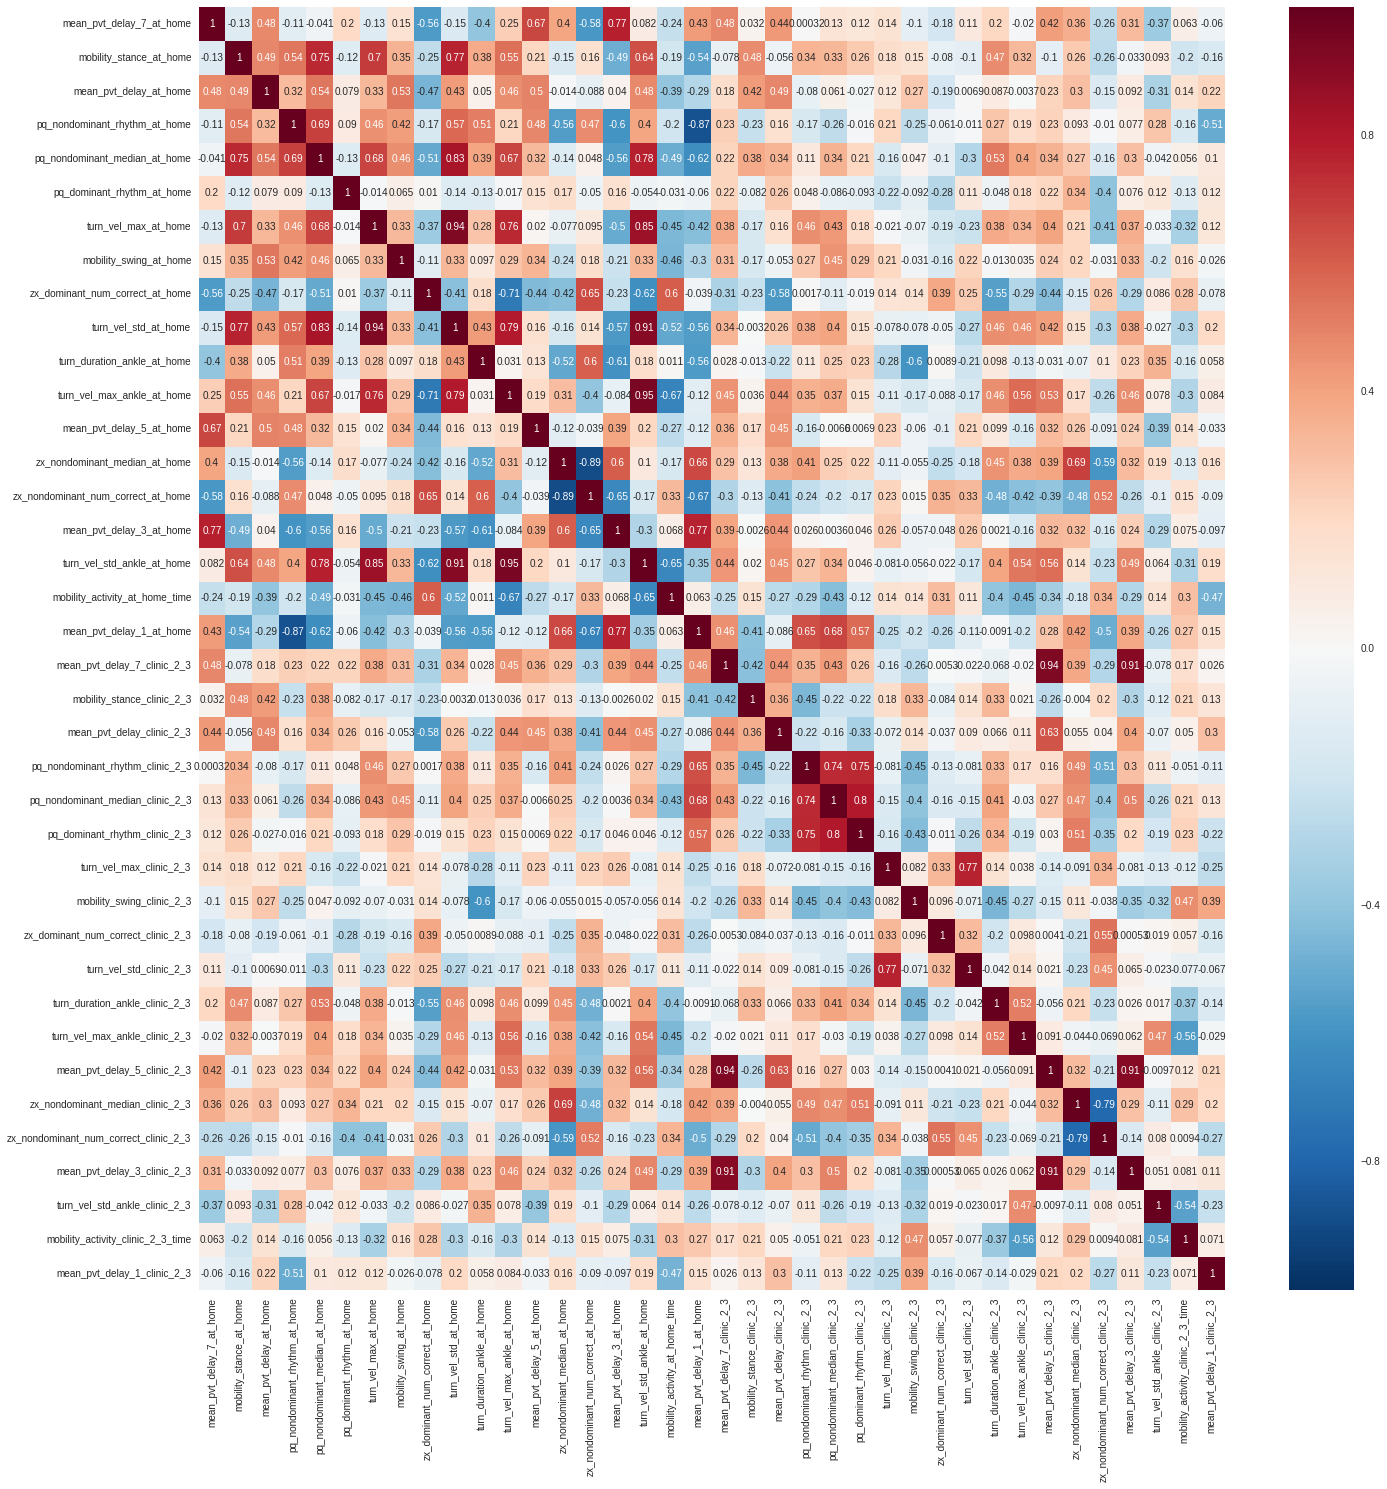

In [33]:
# heatmap of correlation between slopes
plt.figure(figsize=(23,23))
sns.heatmap(summary_of_slopes_df.corr(),annot=True)

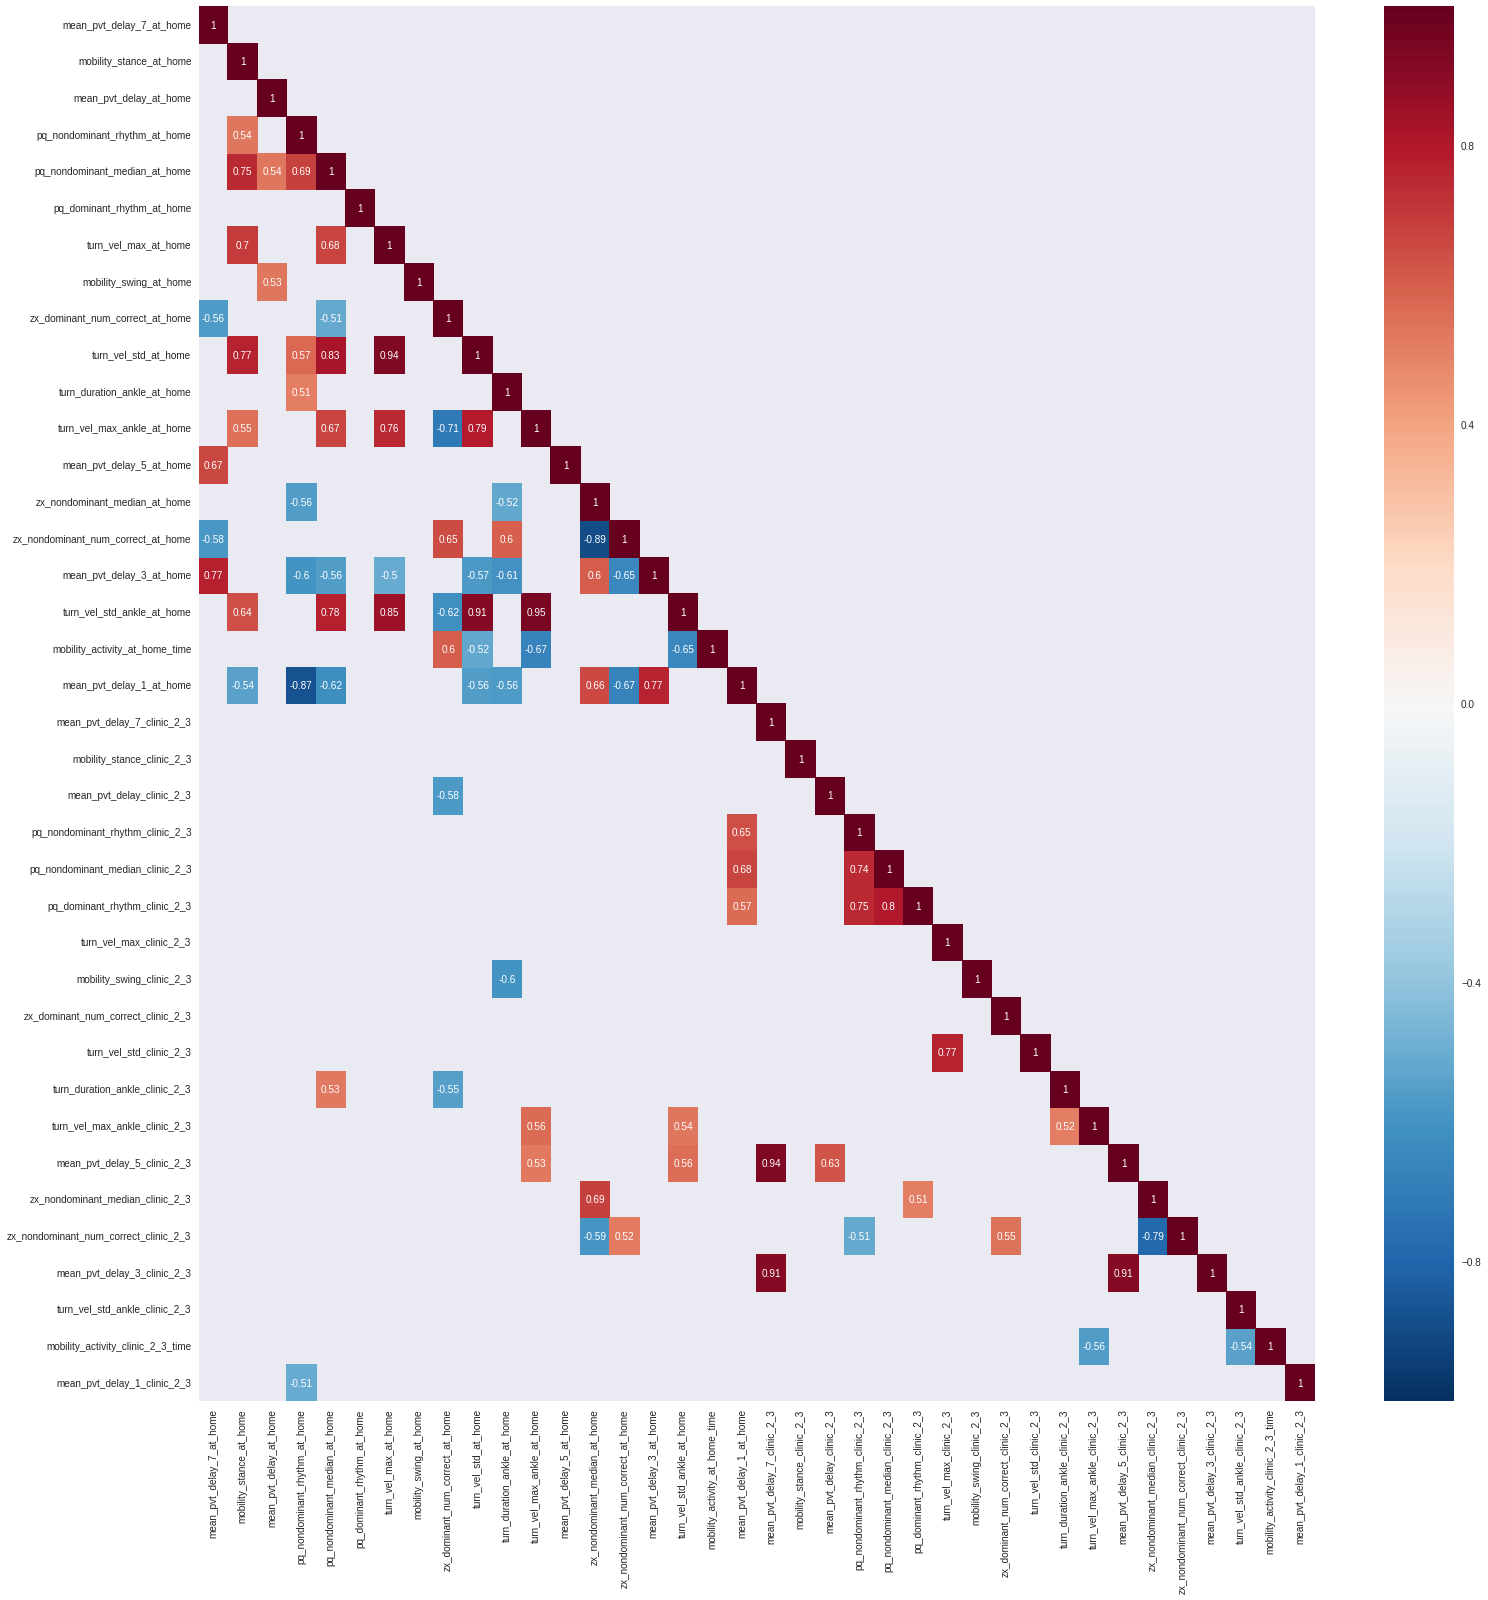

In [34]:
# make the low corelated values to mask from the heatmap
def func(x):
    if (x > -0.5) & (x < 0.50):
        return True
    else:
        return False
    
df = summary_of_slopes_df.corr()

# make a mask dataframe
mask = df.isnull()
for name in list(df.columns):
    mask[name] = df[name].apply(func)
# mask top half of the map as it is symmetrical
(row,col) = mask.shape
for i in range(row):
    for j in range(col):
        if j > i:
            mask.iloc[i][j] = True
# plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df, mask=mask, annot=True)

In [35]:
def corr_and_p_values(df):
    # calculating p values along with correlation values for a dataframe
    # input: a dataframe
    # output: the correlation and p values between each pair of clolumns in input dataframe
    import numpy as np
    import pandas as pd
    from scipy.stats import pearsonr

    coeffmat = np.zeros((df.shape[1], df.shape[1]))
    pvalmat = np.zeros((df.shape[1], df.shape[1]))

    for i in range(df.shape[1]):    
        for j in range(df.shape[1]): 
            column1 = df.columns[i]
            column2 = df.columns[j]
            # drop all null values
            # pearsonr cannot handle null values in data(will return null for the whole)
            df_clean = df[[column1, column2]].dropna()
            df_clean.columns = [column1 + '_1', column2 + '_2']
            corrtest = pearsonr(df_clean[column1 + '_1'], df_clean[column2 + '_2'])

            coeffmat[i,j] = corrtest[0]
            pvalmat[i,j] = corrtest[1]
    # make a new dataframe with correlation and p values included
    dfcoeff = pd.DataFrame(coeffmat, columns=df.columns, index=df.columns)
    dfpvals = pd.DataFrame(pvalmat, columns=df.columns, index=df.columns)
    # return the new dataframe
    return dfcoeff, dfpvals

In [36]:
def extract_high_corr_low_p_value(dfcoeff,dfpvals,corr_th,p_th):
    # look at the p values of highly correlated features
    # input: correlation values and p values data frames, threshold for correlation and p values
    # output: highly correlated features with low p values
    feature_1 = []
    feature_2 = []
    corr_values = []
    p_values = []
    for col in list(dfcoeff.columns):
        for row in list(dfcoeff.index):
            # look for high correlation with low p values
            if (np.abs(dfcoeff[col][row]) >= corr_th) & (dfpvals[col][row] <= p_th):
                # ignore the diagonal features 
                if (row != col): 
                    # look for features that their device values has correlation with clinic values
                    if ((row.split('_clinic_2_3')[0]) == (col.split('_at_home')[0])) | ((col.split('_clinic_2_3')[0]) == (row.split('_at_home')[0])):
                        corr_val = dfcoeff[col][row]
                        p_val = dfpvals[col][row]
                        feature_1.append(col)
                        feature_2.append(row)
                        corr_values.append(corr_val)
                        p_values.append(p_val)
    res = pd.DataFrame()
    res['feature_1'] = feature_1
    res['feature_2'] = feature_2
    res['corr_values'] = corr_values
    res['p_values'] = p_values
    return res

In [37]:
# look at features with high correlations and low p values
# define thresholds for pvalue and correlation value
corr_th = 0.5
p_th = 0.05

df = summary_of_slopes_df.drop('patient_IDs',axis=1)
dfcoeff, dfpvals = corr_and_p_values(df)
res = extract_high_corr_low_p_value(dfcoeff,dfpvals,corr_th,p_th)

dfcoeff.head()
dfpvals.head()
res

feature_1  \
0             turn_vel_max_ankle_at_home   
1          zx_nondominant_median_at_home   
2     zx_nondominant_num_correct_at_home   
3          turn_vel_max_ankle_clinic_2_3   
4       zx_nondominant_median_clinic_2_3   
5  zx_nondominant_num_correct_clinic_2_3   

                               feature_2  corr_values  p_values  
0          turn_vel_max_ankle_clinic_2_3     0.564008  0.014769  
1       zx_nondominant_median_clinic_2_3     0.685071  0.001209  
2  zx_nondominant_num_correct_clinic_2_3     0.518892  0.022819  
3             turn_vel_max_ankle_at_home     0.564008  0.014769  
4          zx_nondominant_median_at_home     0.685071  0.001209  
5     zx_nondominant_num_correct_at_home     0.518892  0.022819

In [39]:
# have a closer look into features for which the rate of change found highly correlated to that of clinical visits
# plot feature values and clinical measurements on a same graph
at_home_features_highly_correlated

['mean_pvt_delay_7_at_home',
 'mobility_stance_at_home',
 'mean_pvt_delay_at_home',
 'pq_nondominant_rhythm_at_home',
 'pq_nondominant_median_at_home',
 'pq_dominant_rhythm_at_home',
 'turn_vel_max_at_home',
 'mobility_swing_at_home',
 'zx_dominant_num_correct_at_home',
 'turn_vel_std_at_home',
 'turn_duration_ankle_at_home',
 'turn_vel_max_ankle_at_home',
 'mean_pvt_delay_5_at_home',
 'zx_nondominant_median_at_home',
 'zx_nondominant_num_correct_at_home',
 'mean_pvt_delay_3_at_home',
 'turn_vel_std_ankle_at_home',
 'mobility_activity_at_home_time',
 'mean_pvt_delay_1_at_home']

turn_vel_max_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


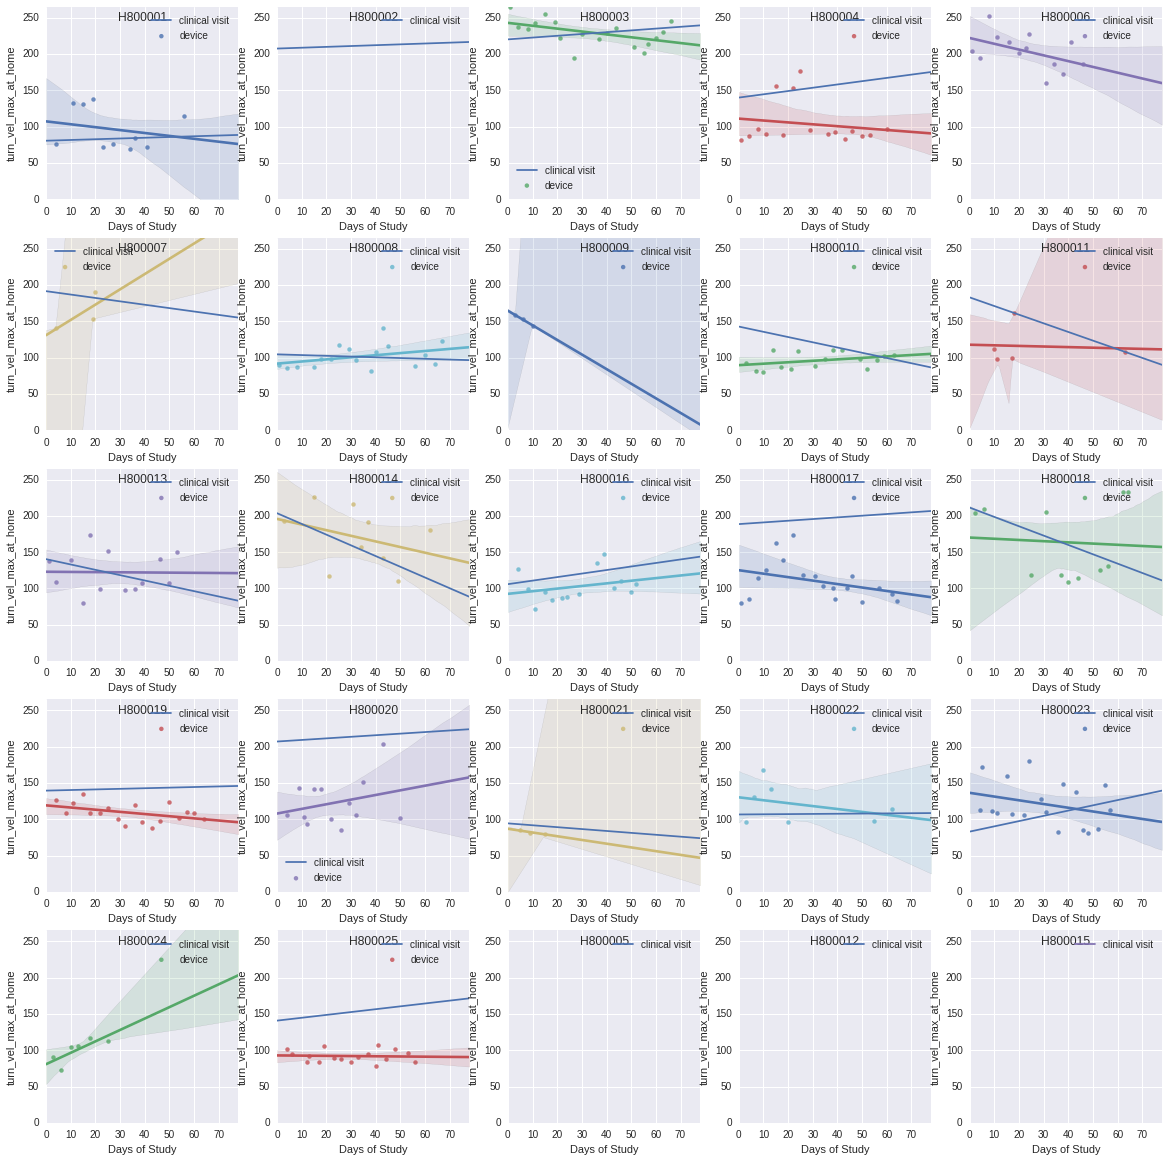

In [41]:
# turn_vel_max_at_home
feature = at_home_features_highly_correlated[6]
plot_feature_across_days_and_clinical_visitis(feature)

zx_nondominant_median_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


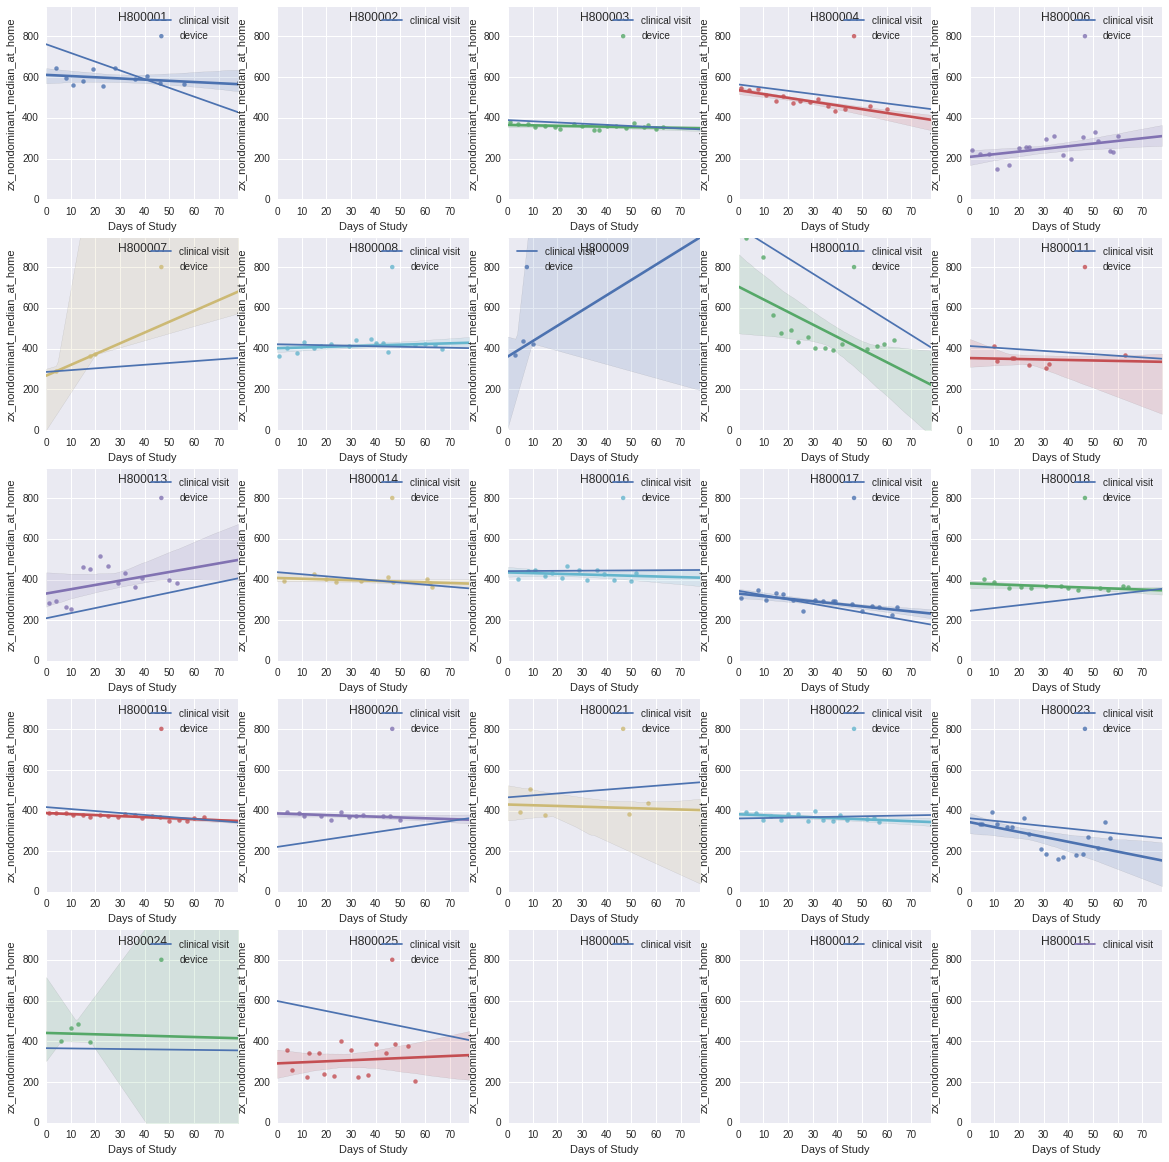

In [42]:
# zx_nondominant_median_at_home
feature = at_home_features_highly_correlated[13]
plot_feature_across_days_and_clinical_visitis(feature)

zx_nondominant_num_correct_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


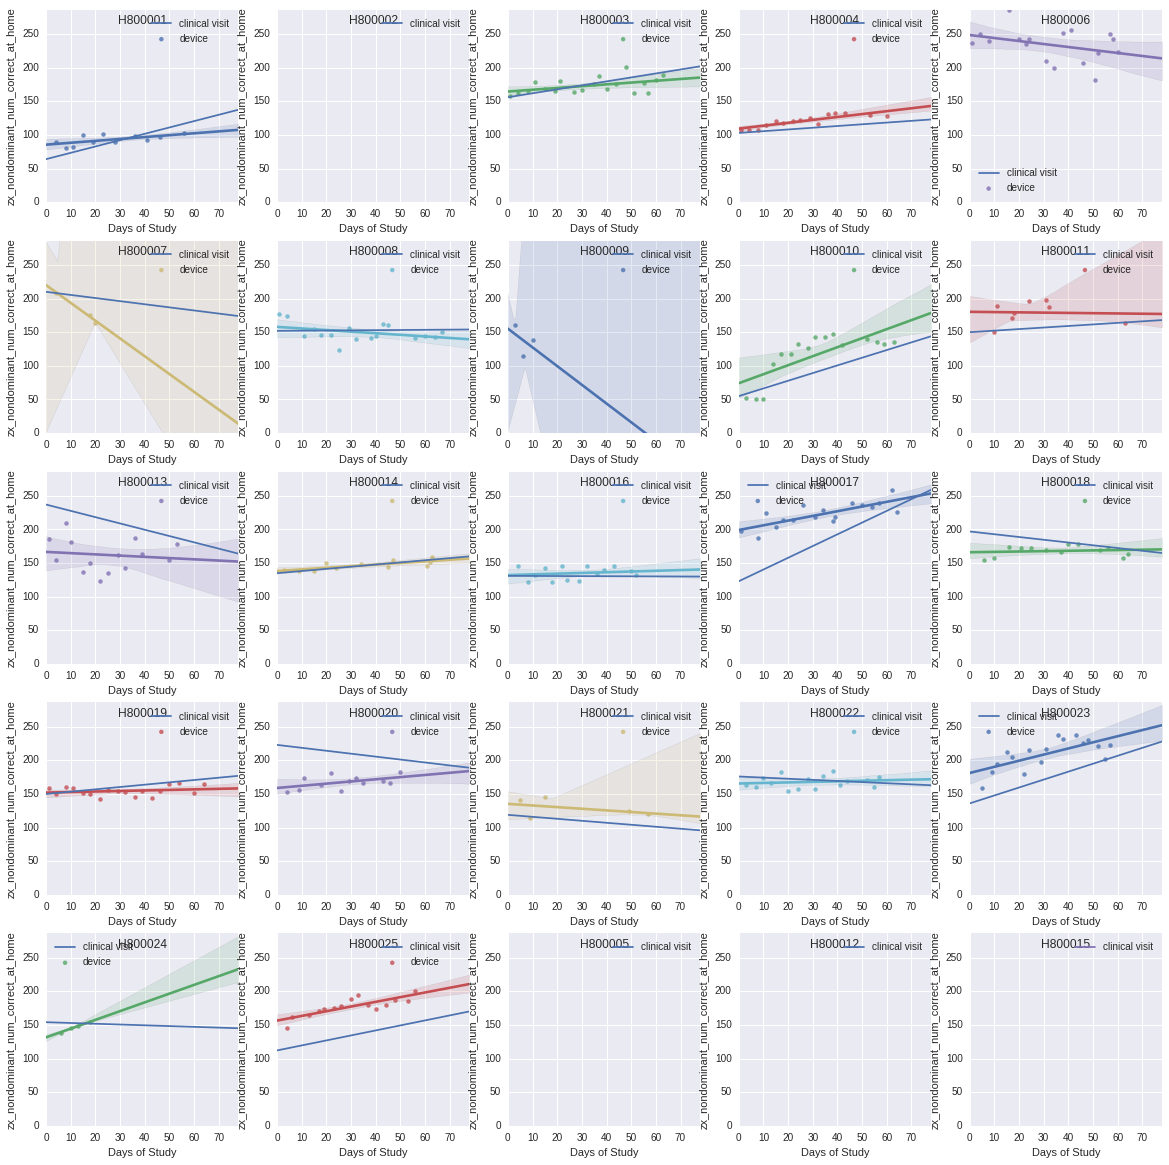

In [45]:
# zx_nondominant_num_correct_at_home
feature = at_home_features_highly_correlated[14]
plot_feature_across_days_and_clinical_visitis(feature)

In [255]:
# for all 19 highly correlated at home features (structured activity)
    # plot variation of a feature, regression lines, over the course of study
    # plot regline for clinical visits 2 and 3

mean_pvt_delay_7_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


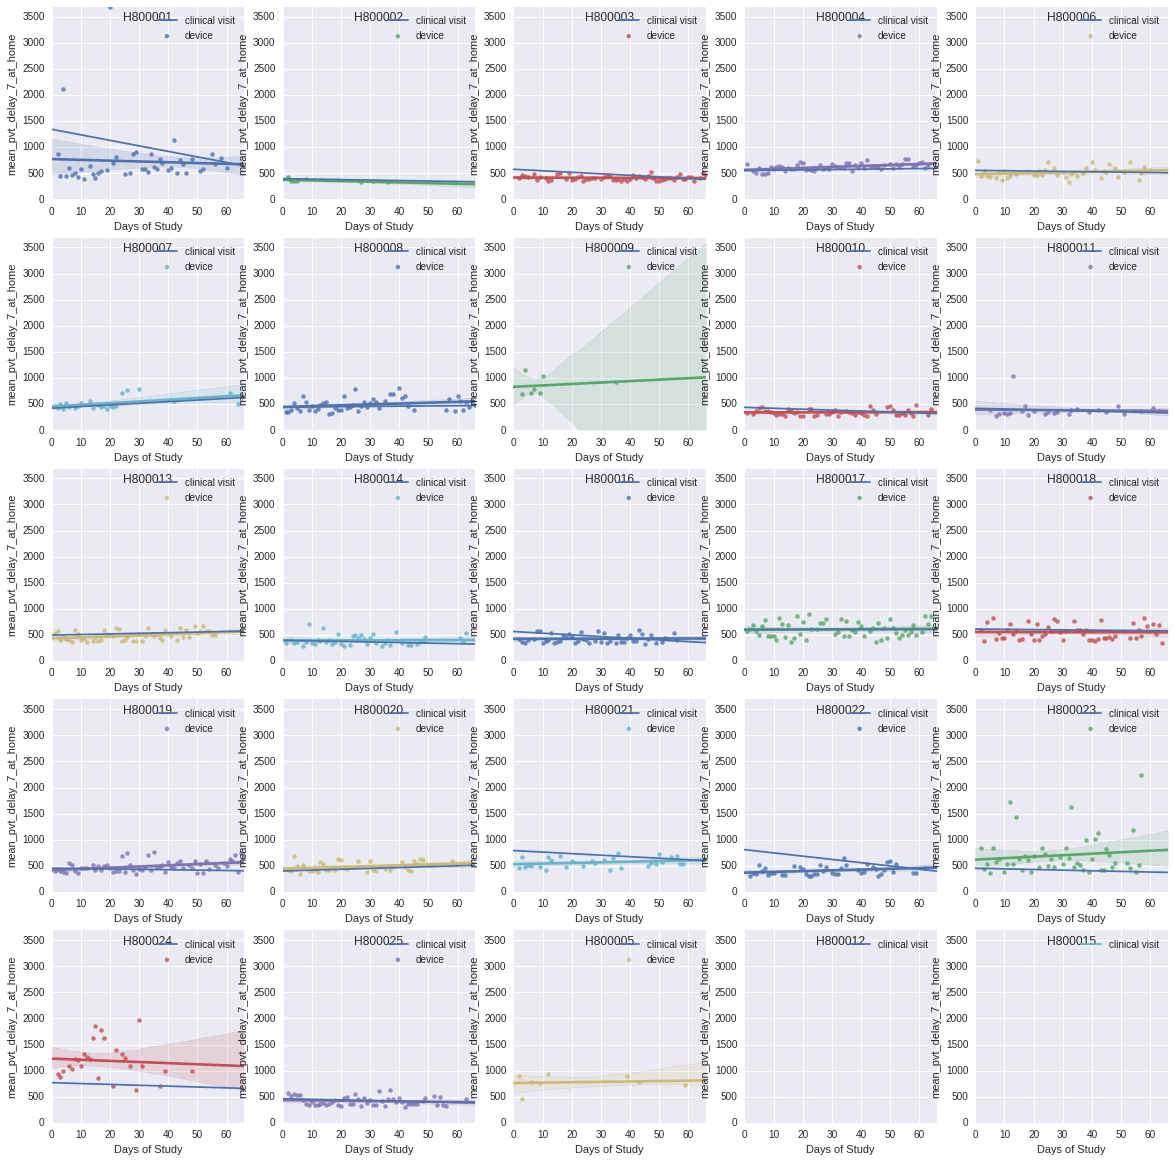

In [165]:
feature = at_home_features_highly_correlated[0]
plot_feature_across_days_and_clinical_visitis(feature)

mobility_stance_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


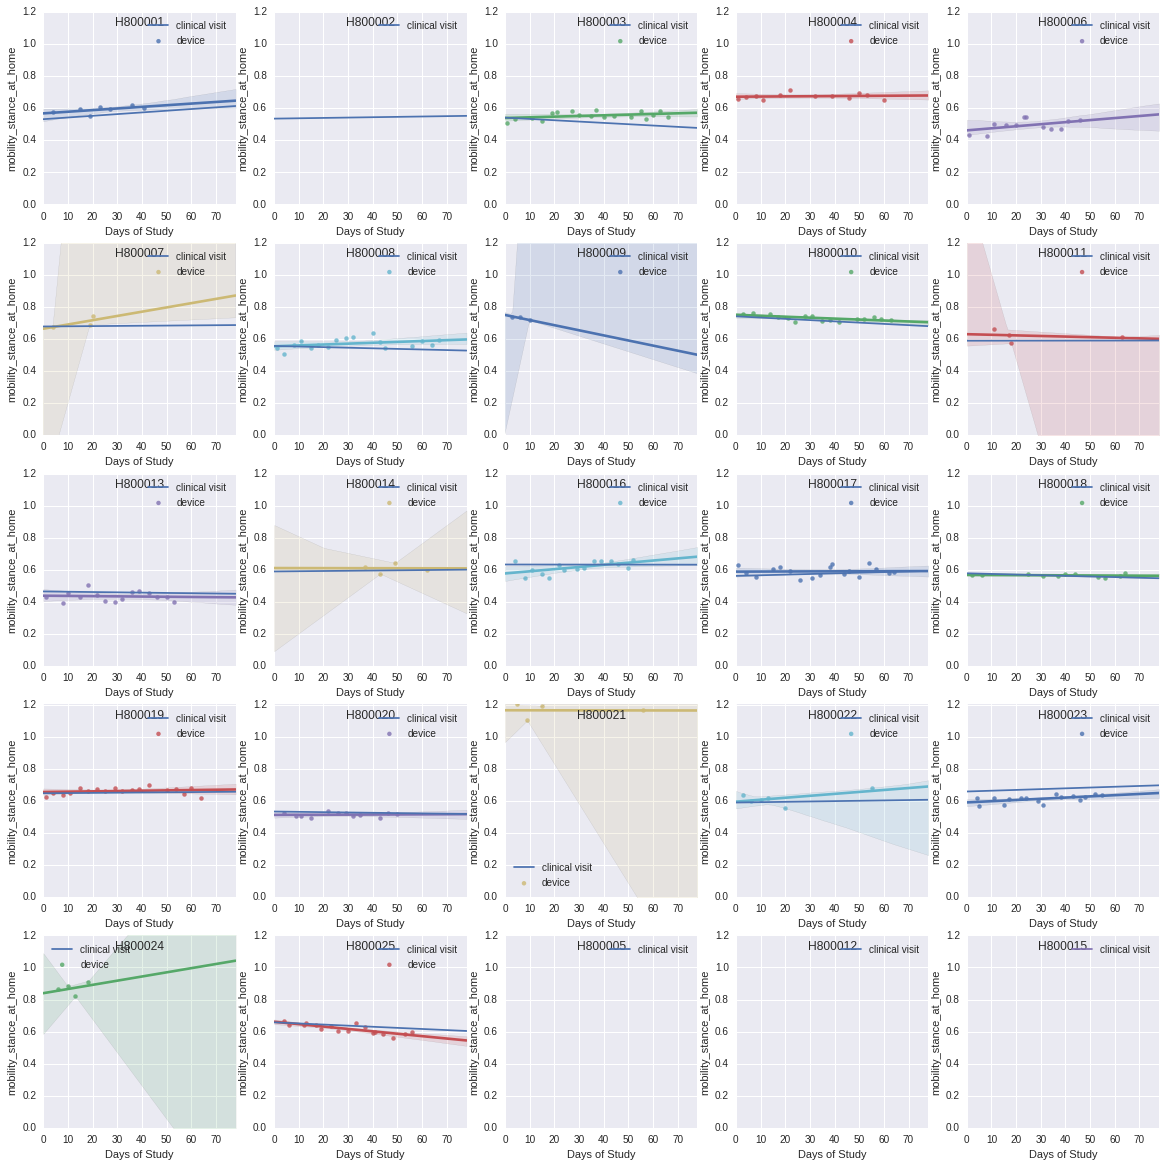

In [166]:
feature = at_home_features_highly_correlated[1]
plot_feature_across_days_and_clinical_visitis(feature)

mean_pvt_delay_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


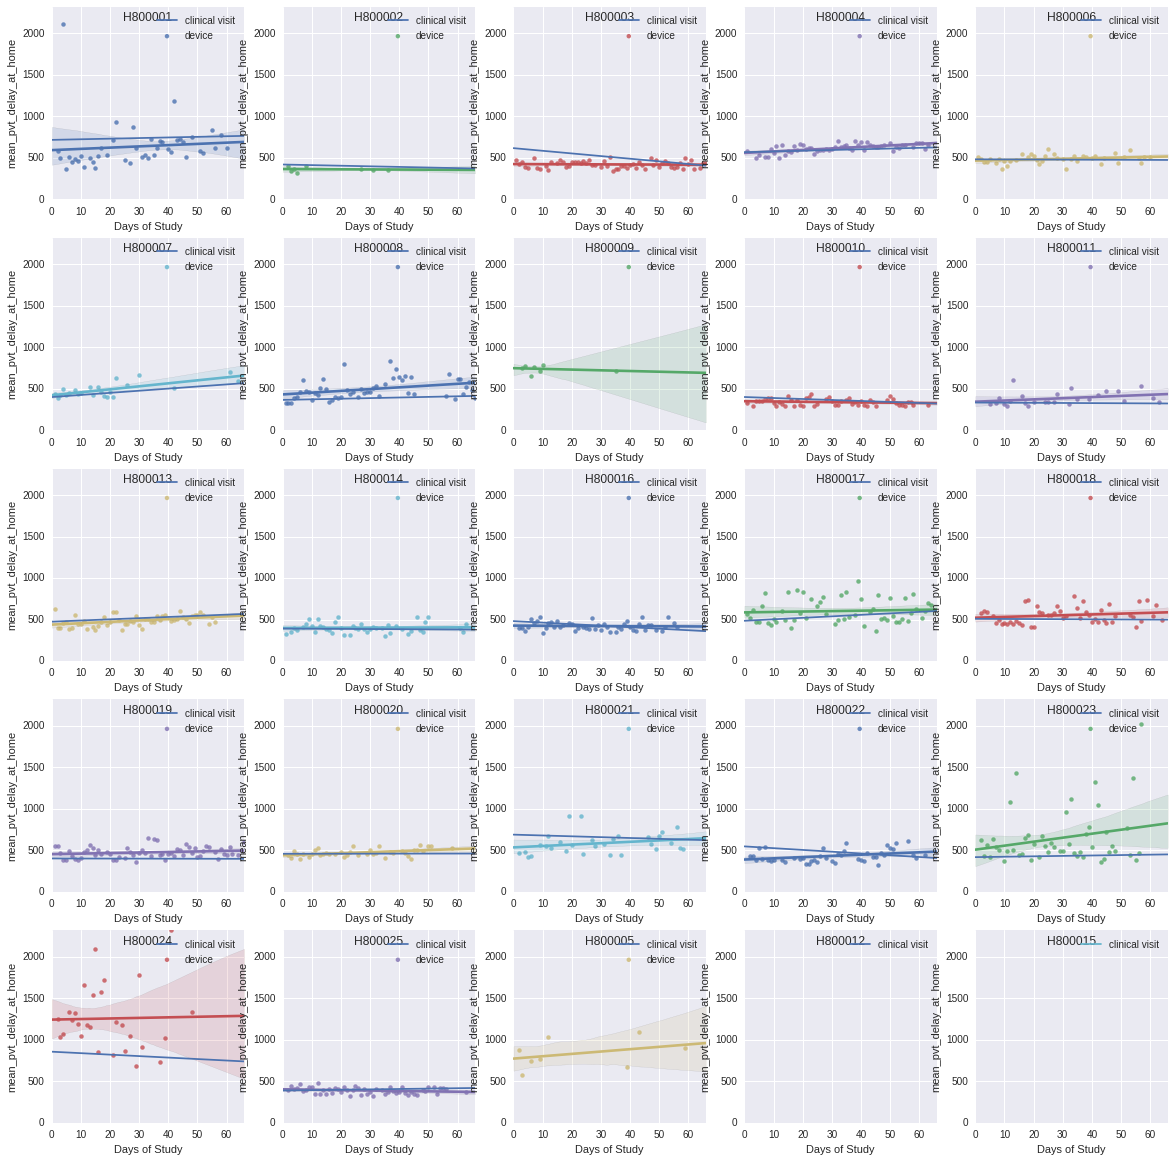

In [167]:
feature = at_home_features_highly_correlated[2]
plot_feature_across_days_and_clinical_visitis(feature)

pq_nondominant_rhythm_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


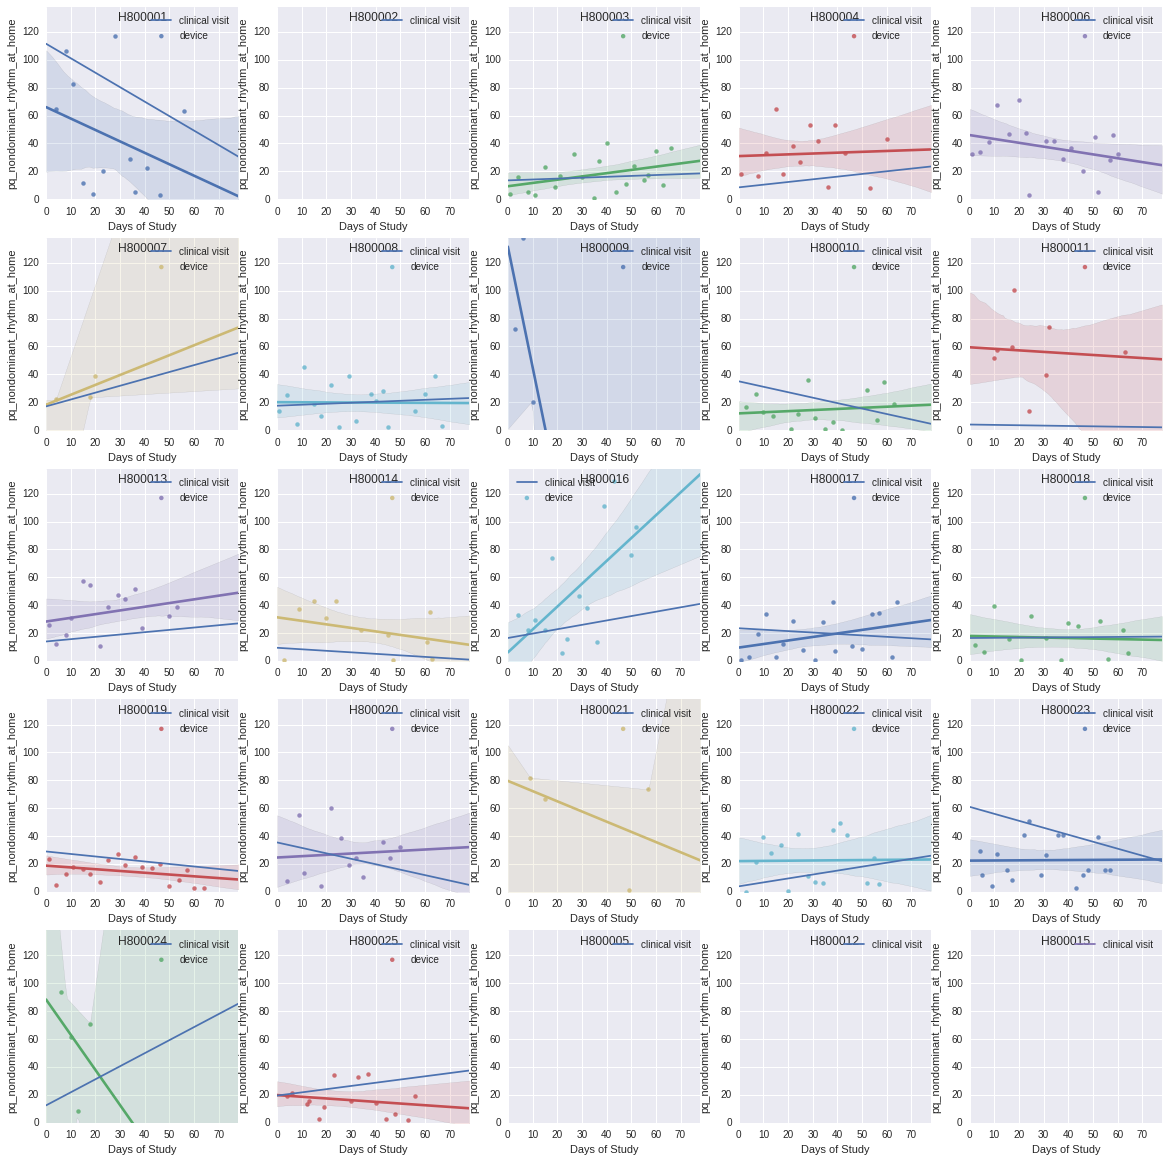

In [168]:
feature = at_home_features_highly_correlated[3]
plot_feature_across_days_and_clinical_visitis(feature)

pq_nondominant_median_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


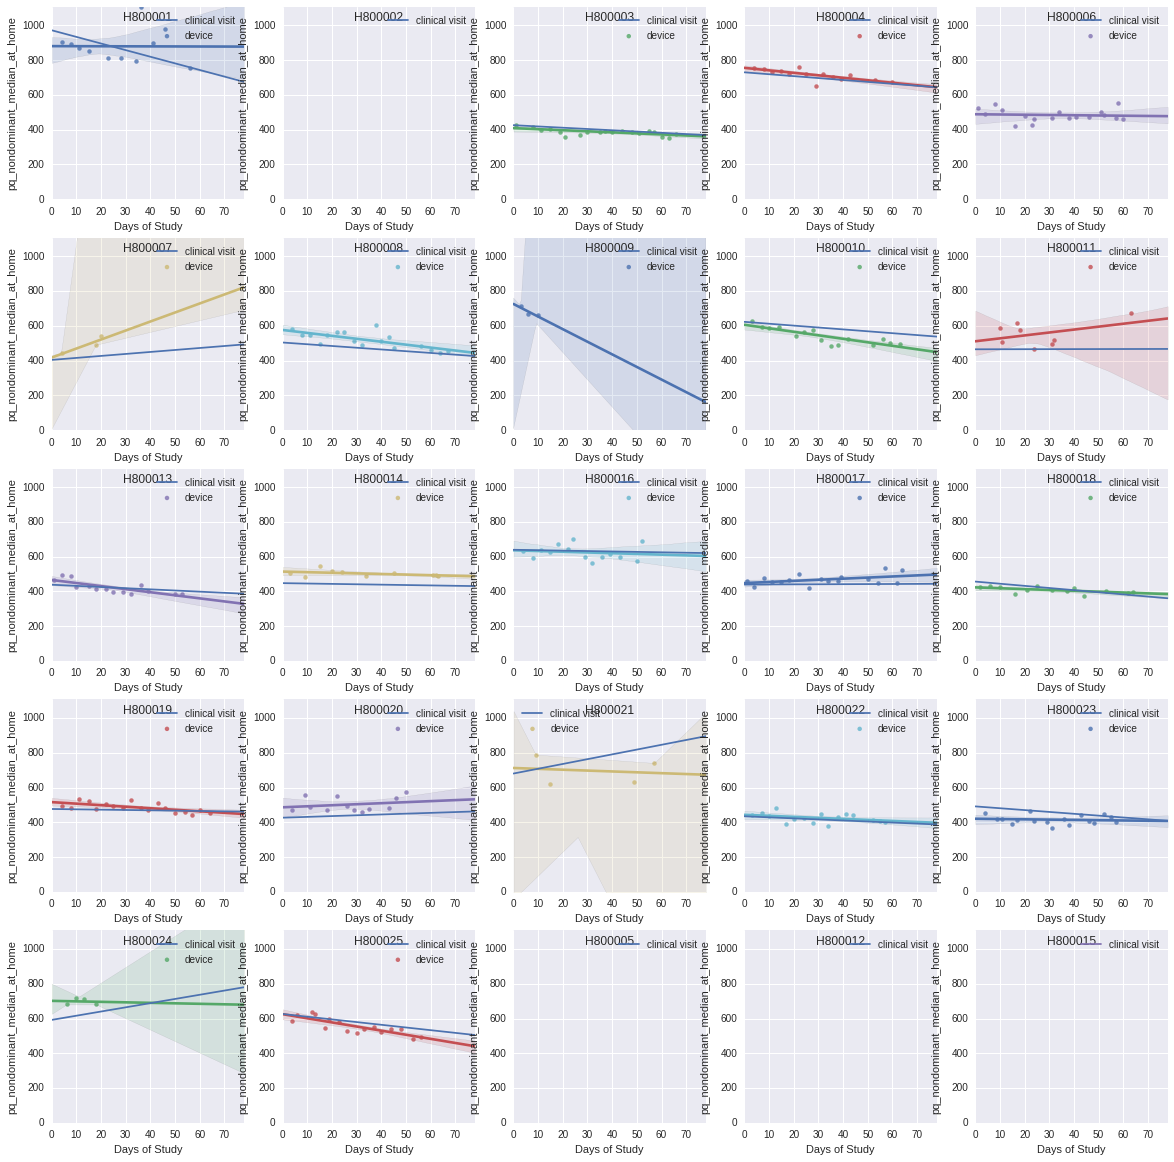

In [169]:
feature = at_home_features_highly_correlated[4]
plot_feature_across_days_and_clinical_visitis(feature)

pq_dominant_rhythm_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


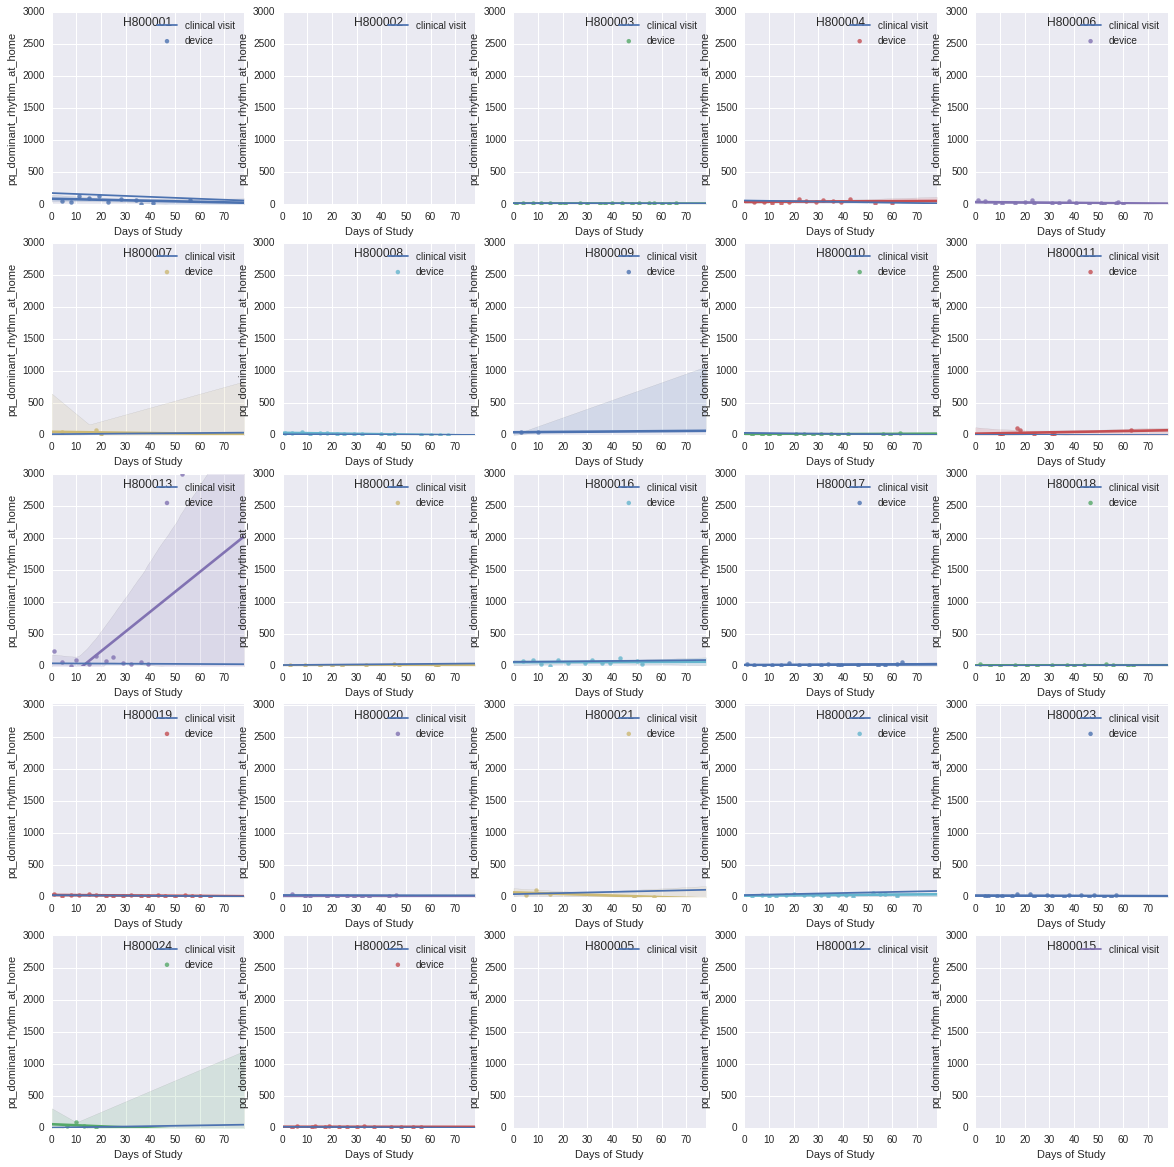

In [170]:
feature = at_home_features_highly_correlated[5]
plot_feature_across_days_and_clinical_visitis(feature)

turn_vel_max_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


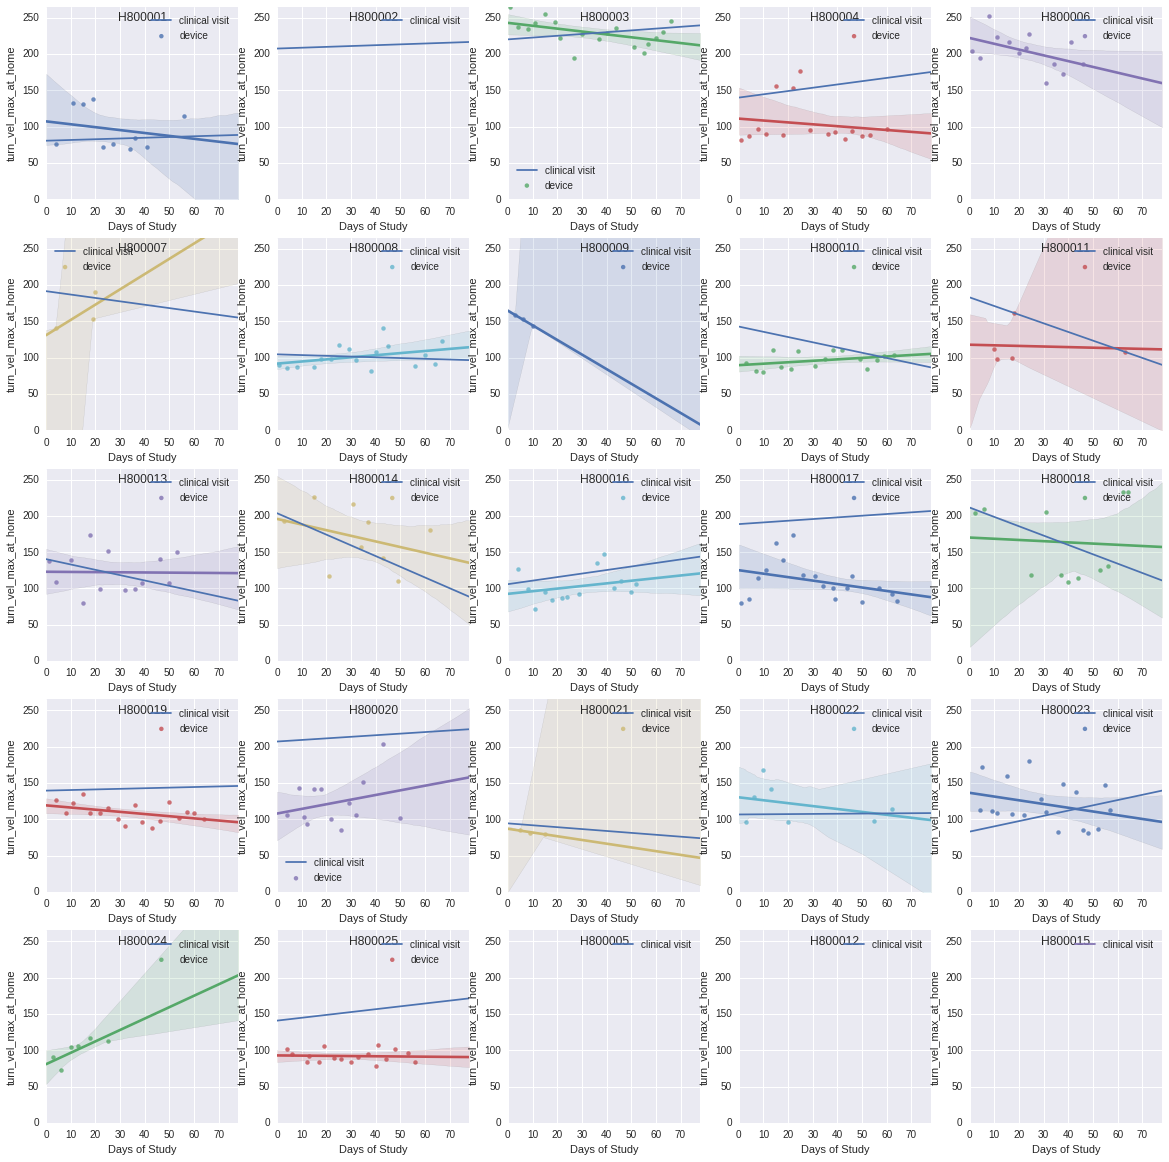

In [171]:
feature = at_home_features_highly_correlated[6]
plot_feature_across_days_and_clinical_visitis(feature)

mobility_swing_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


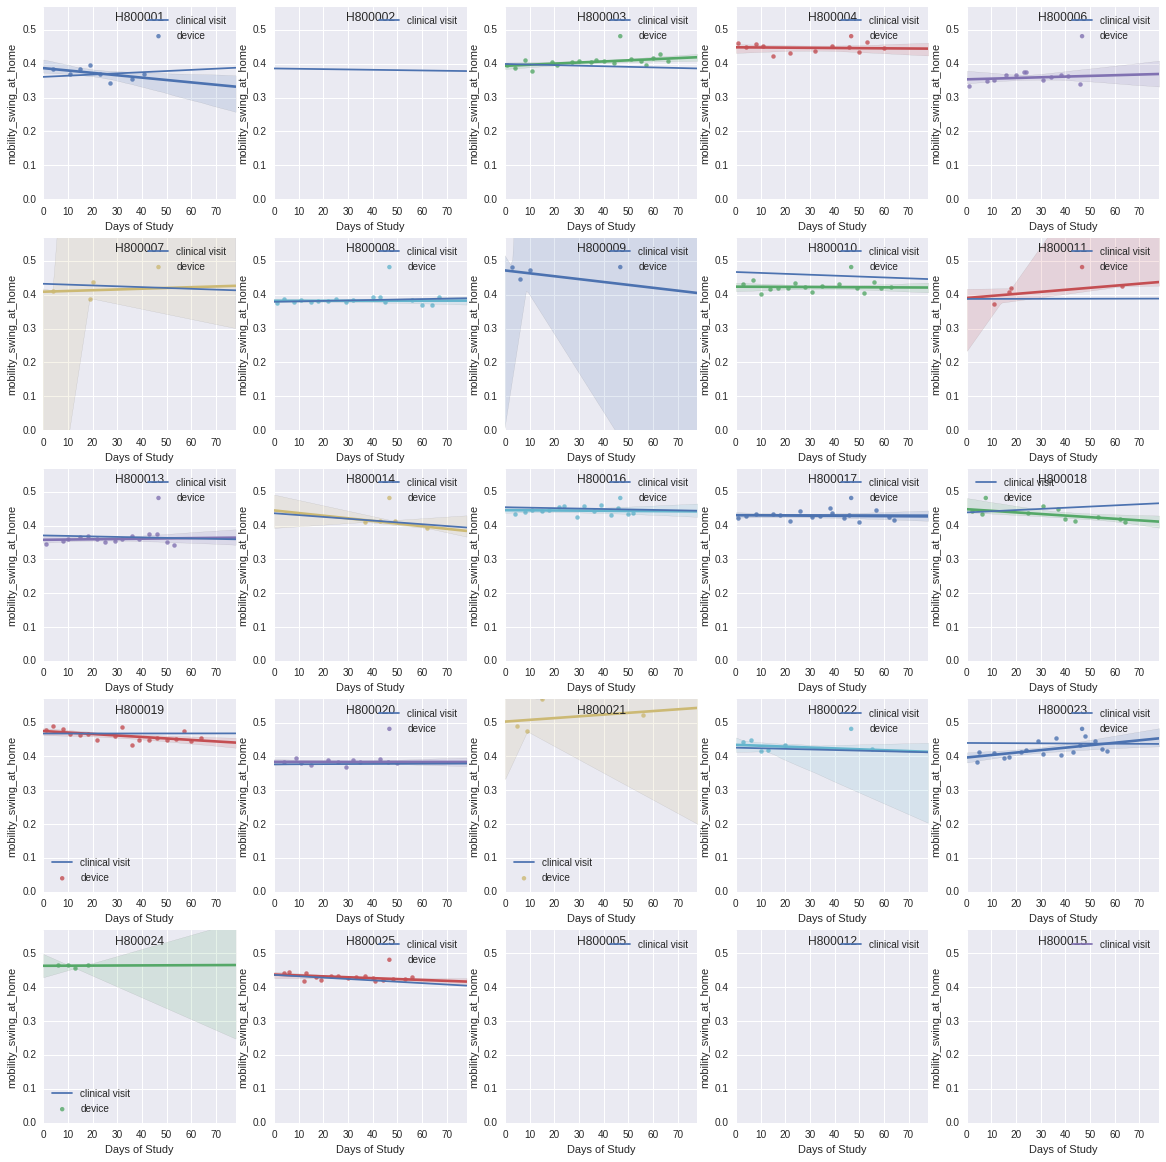

In [172]:
feature = at_home_features_highly_correlated[7]
plot_feature_across_days_and_clinical_visitis(feature)

zx_dominant_num_correct_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


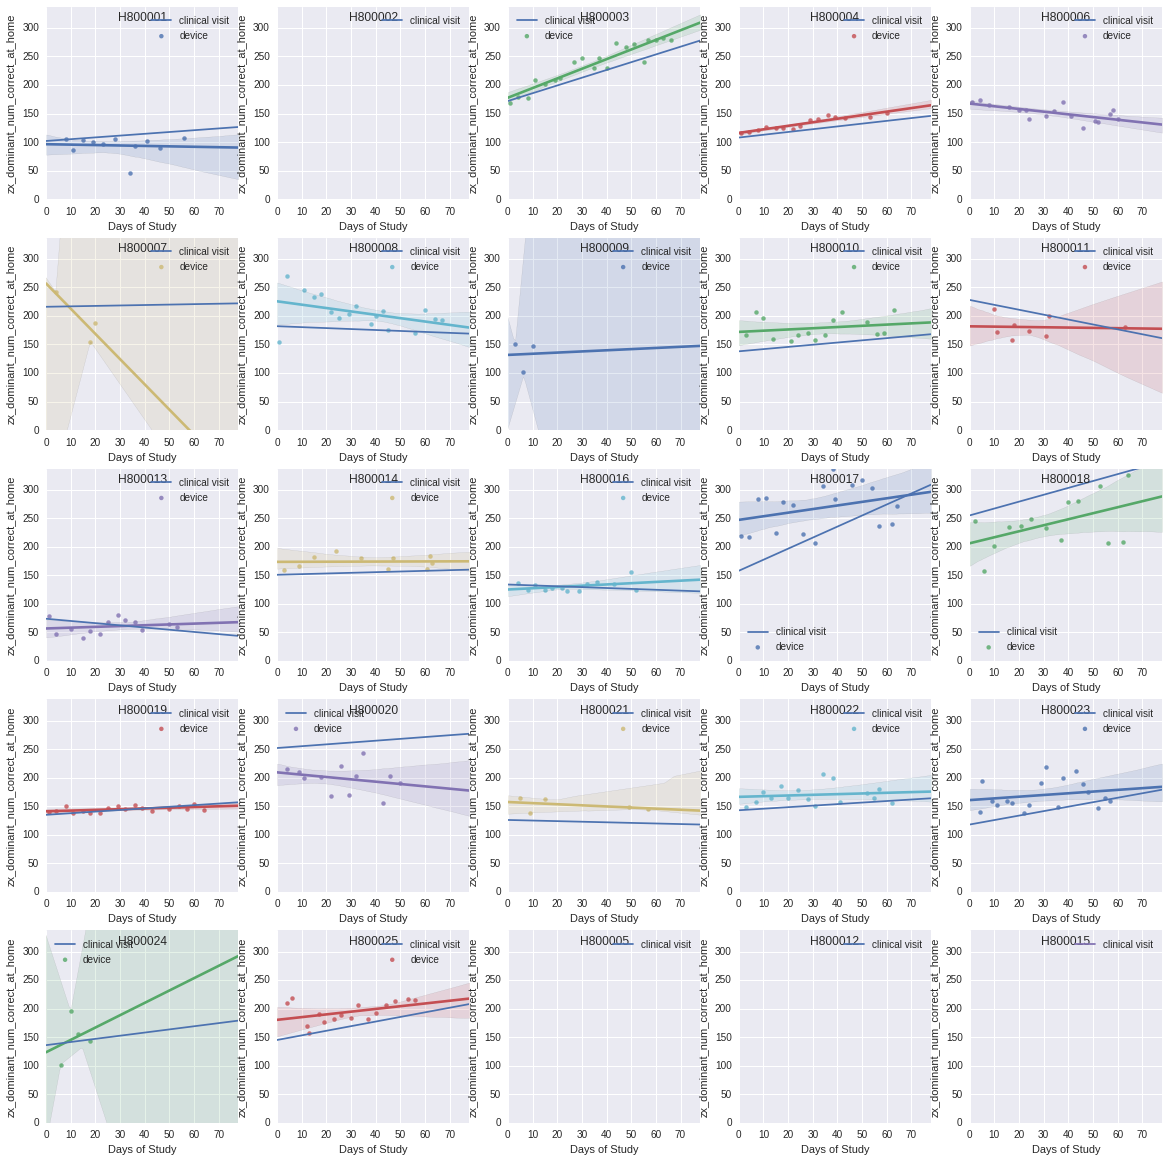

In [173]:
feature = at_home_features_highly_correlated[8]
plot_feature_across_days_and_clinical_visitis(feature)

turn_vel_std_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


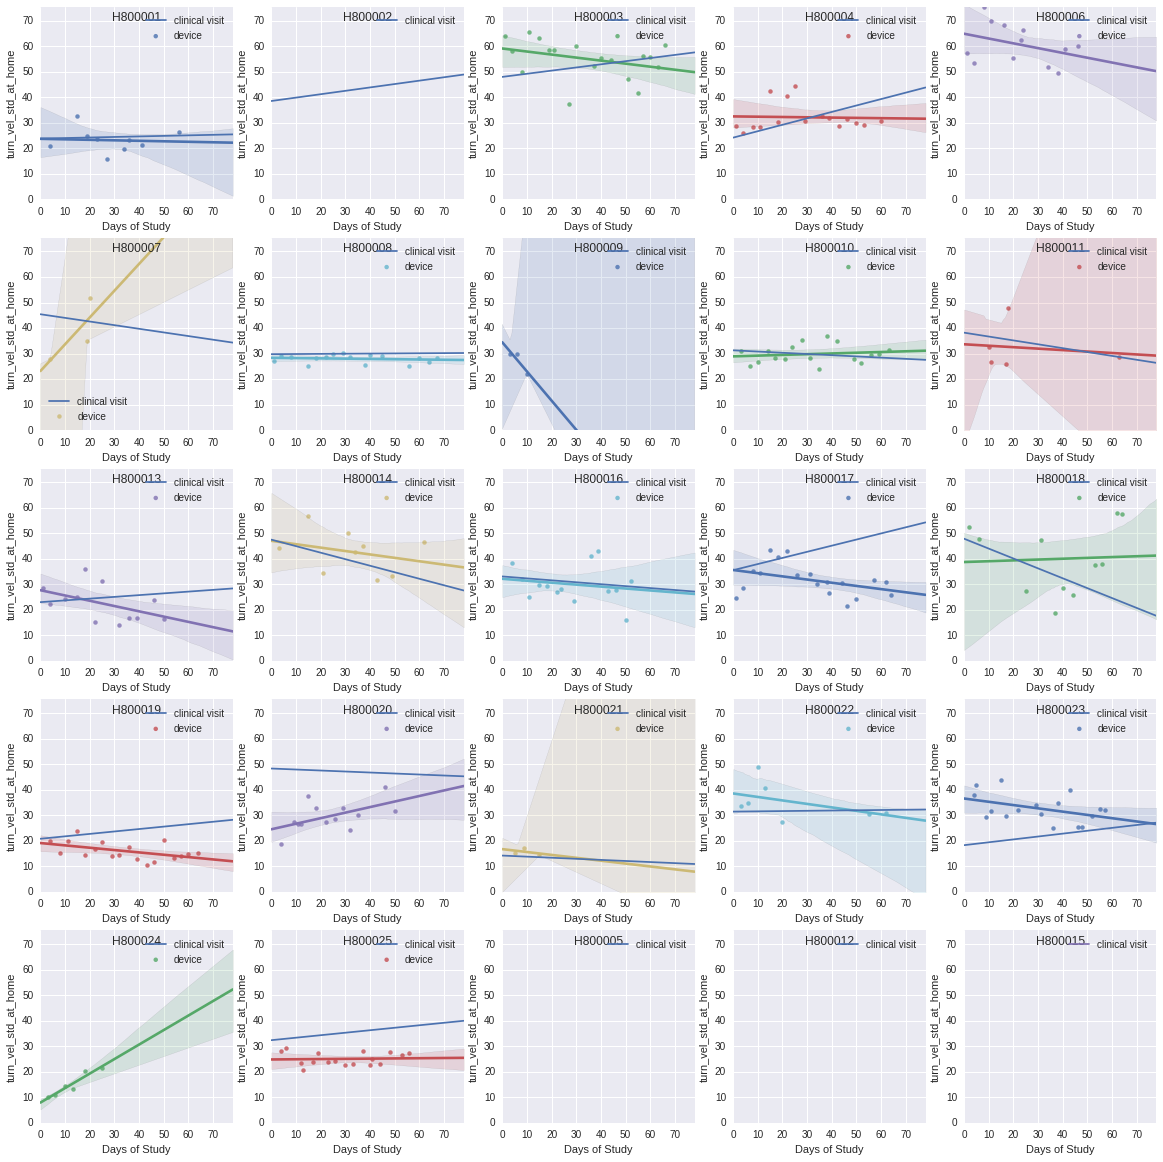

In [174]:
feature = at_home_features_highly_correlated[9]
plot_feature_across_days_and_clinical_visitis(feature)

turn_duration_ankle_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


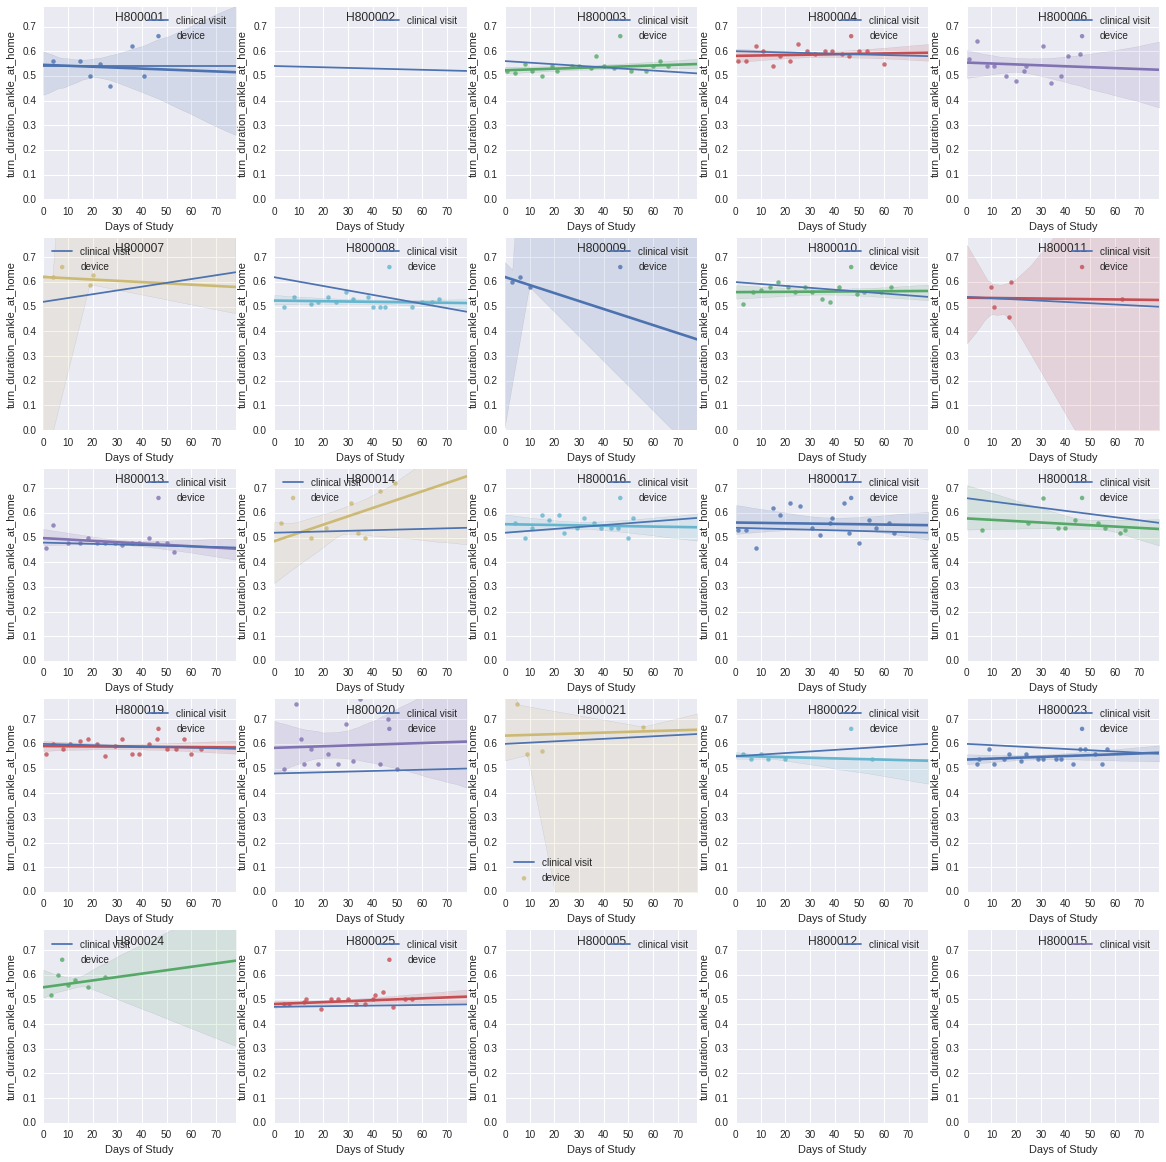

In [175]:
feature = at_home_features_highly_correlated[10]
plot_feature_across_days_and_clinical_visitis(feature)

turn_vel_max_ankle_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


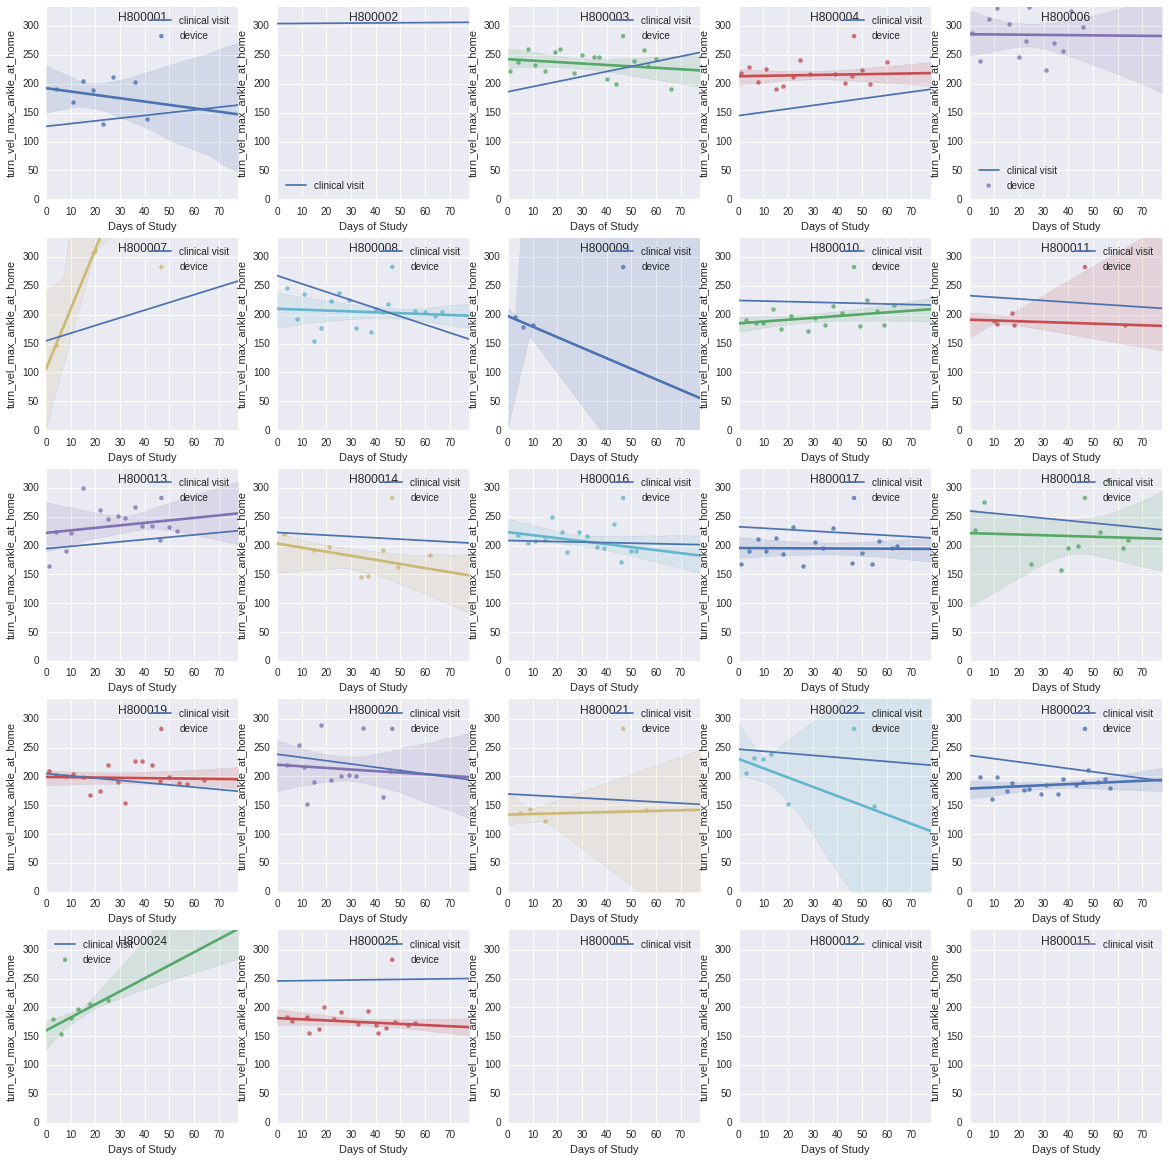

In [176]:
feature = at_home_features_highly_correlated[11]
plot_feature_across_days_and_clinical_visitis(feature)

mean_pvt_delay_5_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


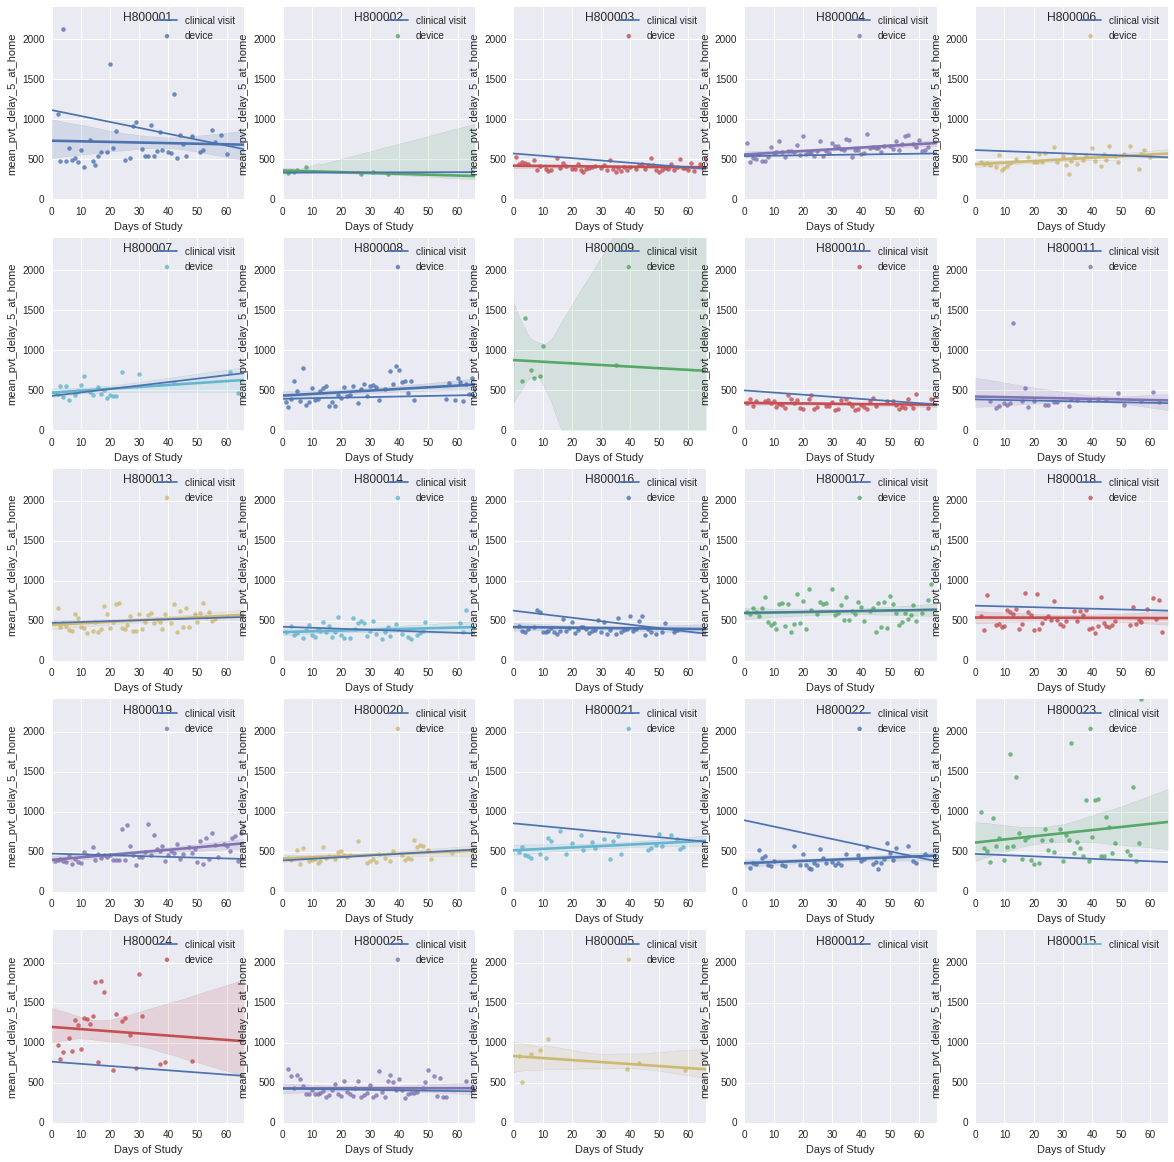

In [177]:
feature = at_home_features_highly_correlated[12]
plot_feature_across_days_and_clinical_visitis(feature)

zx_nondominant_median_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


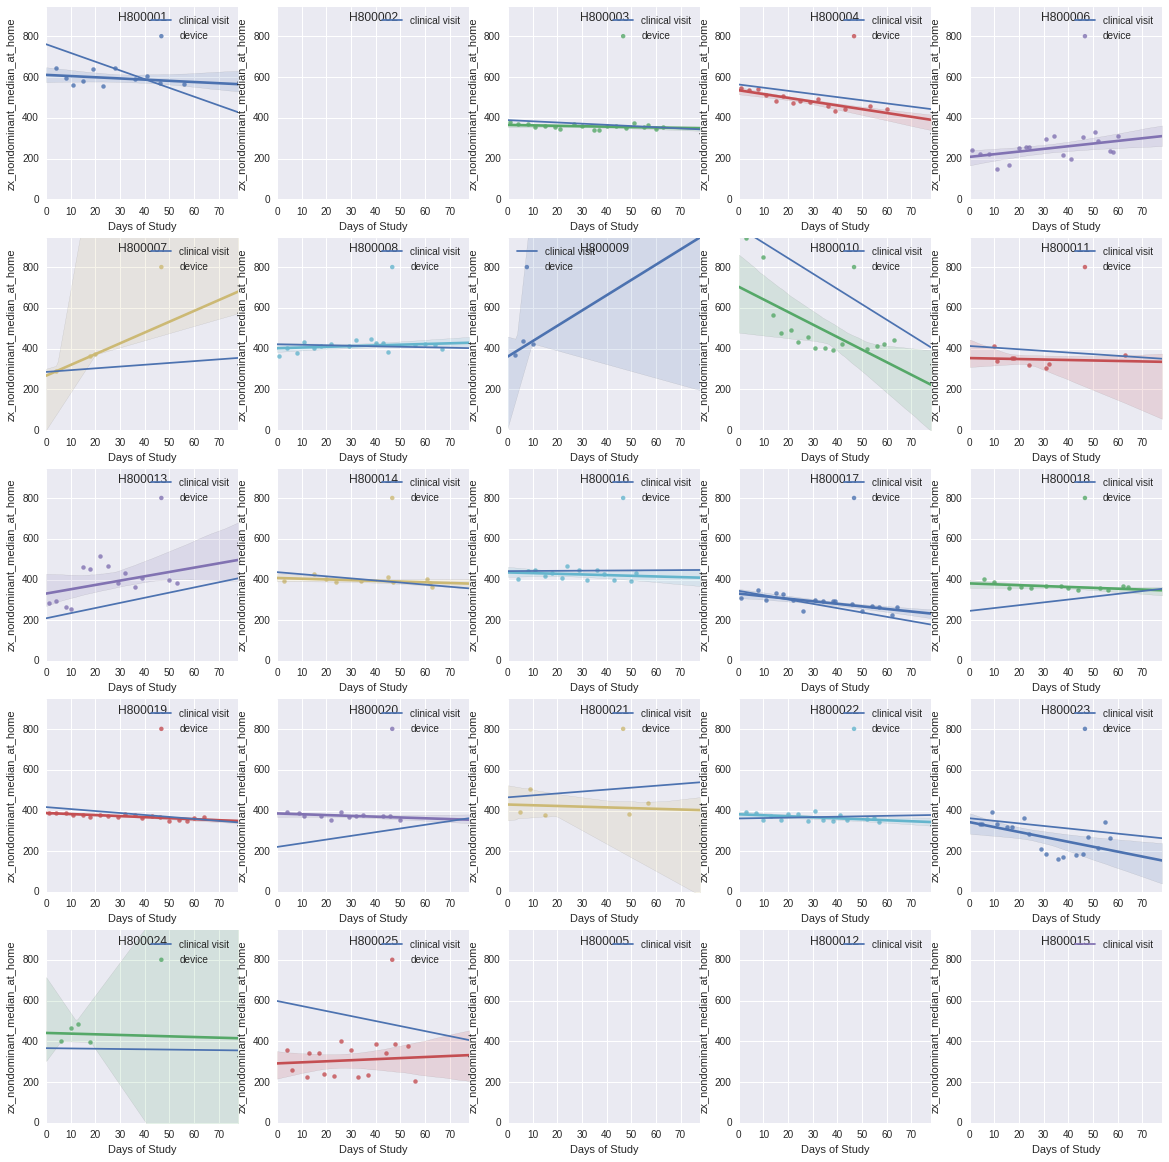

In [178]:
feature = at_home_features_highly_correlated[13]
plot_feature_across_days_and_clinical_visitis(feature)

zx_nondominant_num_correct_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


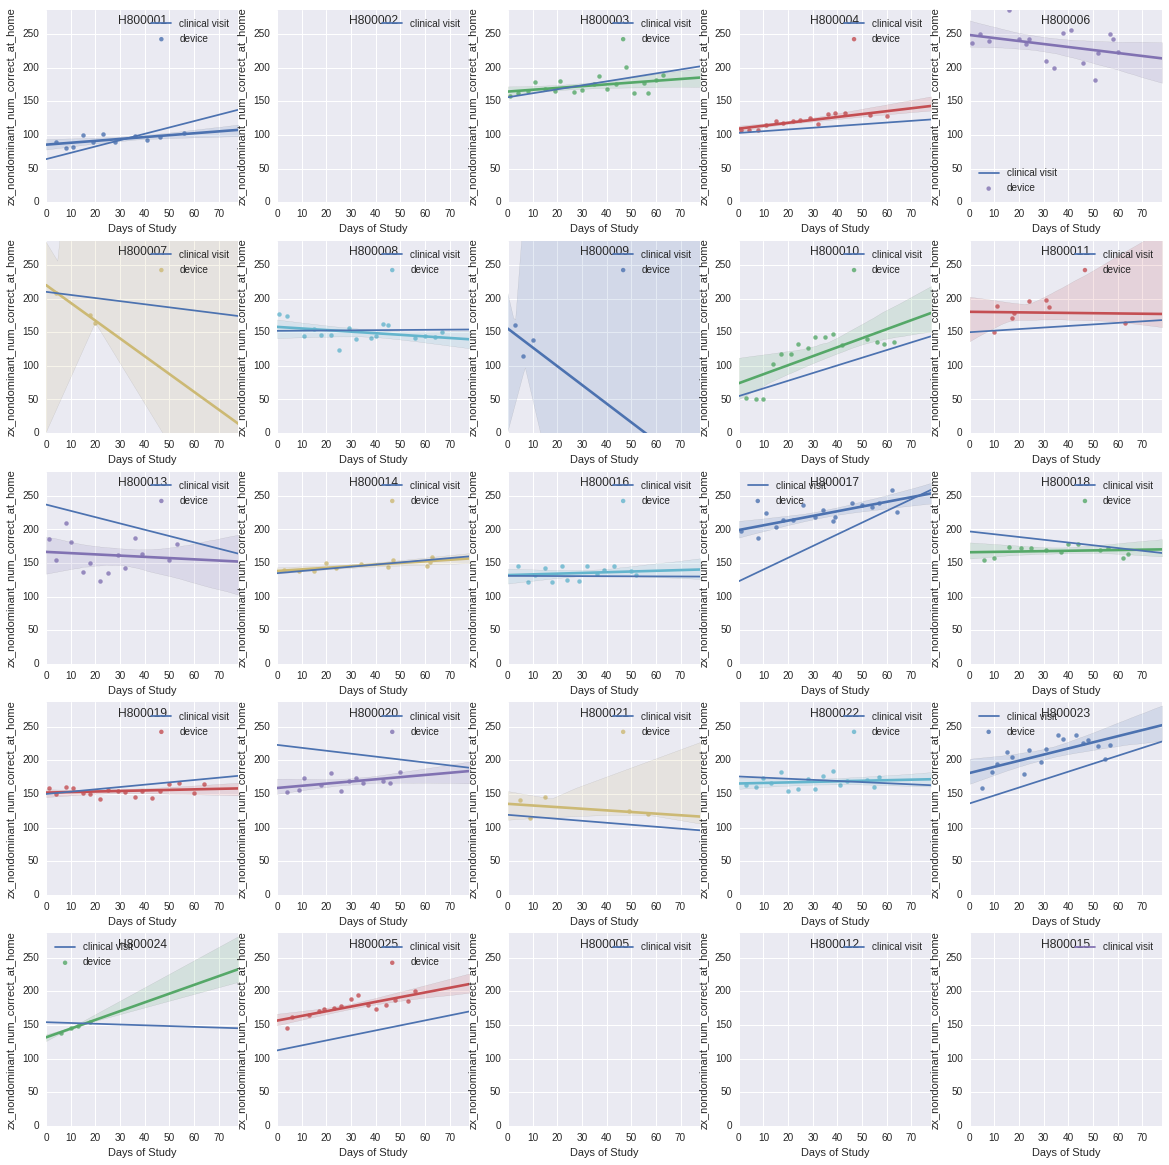

In [179]:
feature = at_home_features_highly_correlated[14]
plot_feature_across_days_and_clinical_visitis(feature)

mean_pvt_delay_3_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


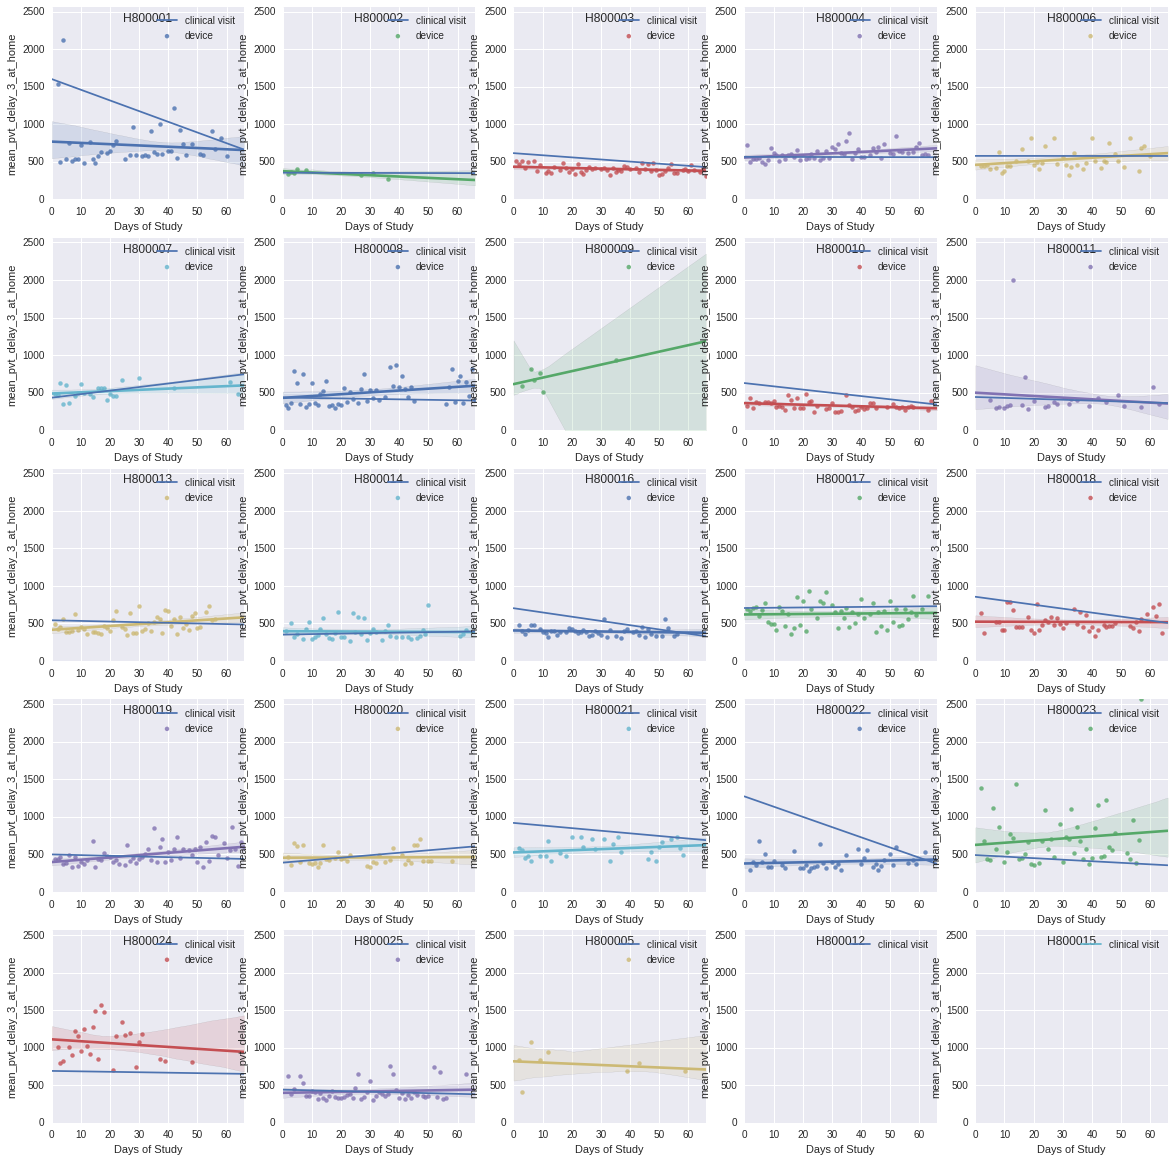

In [180]:
feature = at_home_features_highly_correlated[15]
plot_feature_across_days_and_clinical_visitis(feature)

turn_vel_std_ankle_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


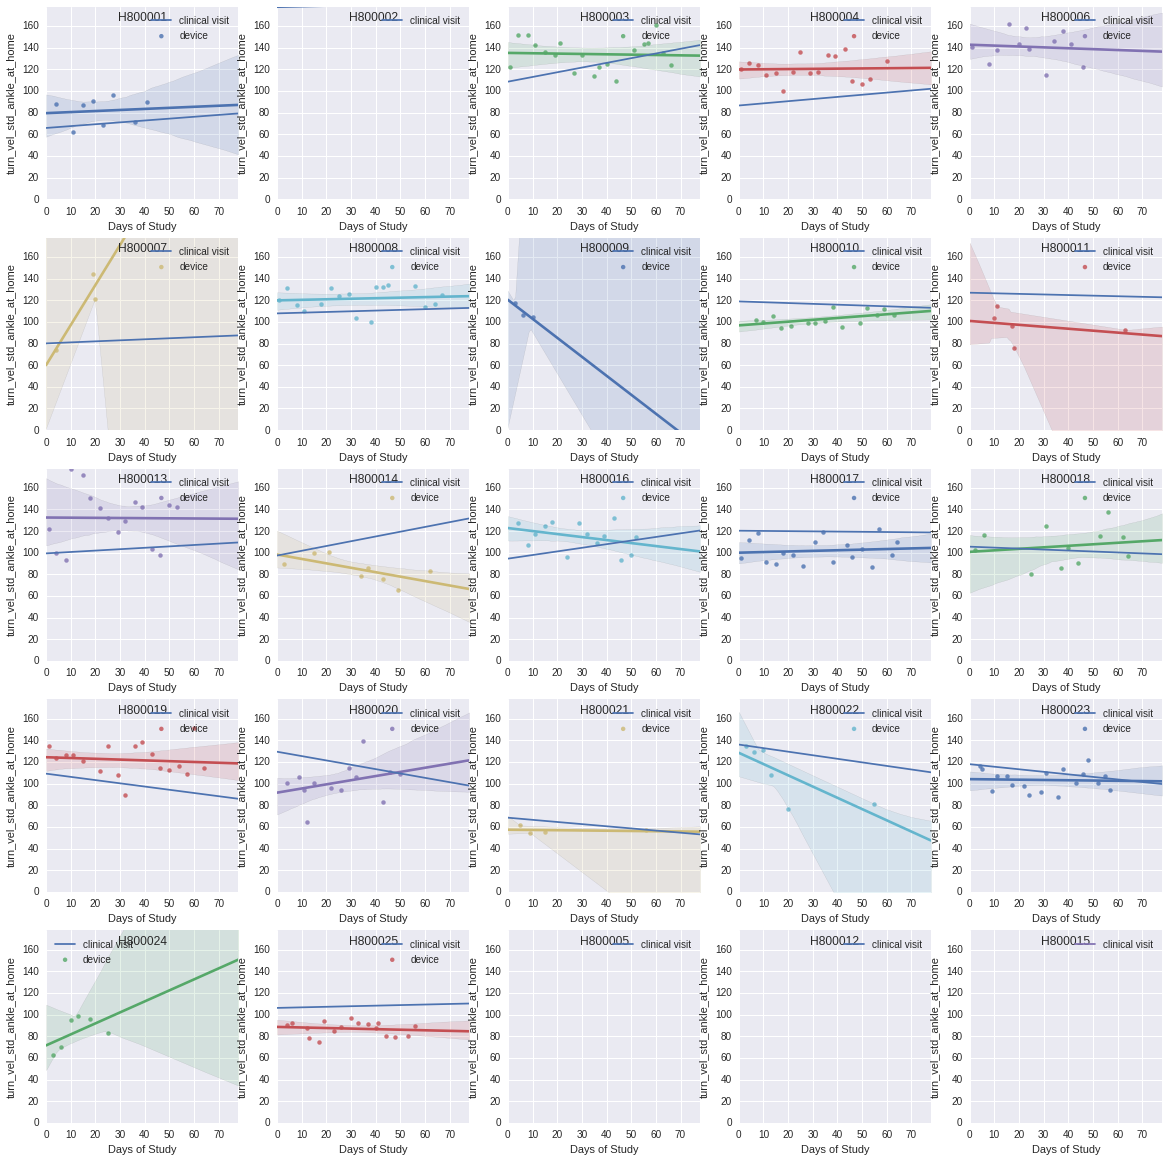

In [181]:
feature = at_home_features_highly_correlated[16]
plot_feature_across_days_and_clinical_visitis(feature)

mobility_activity_at_home_time


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


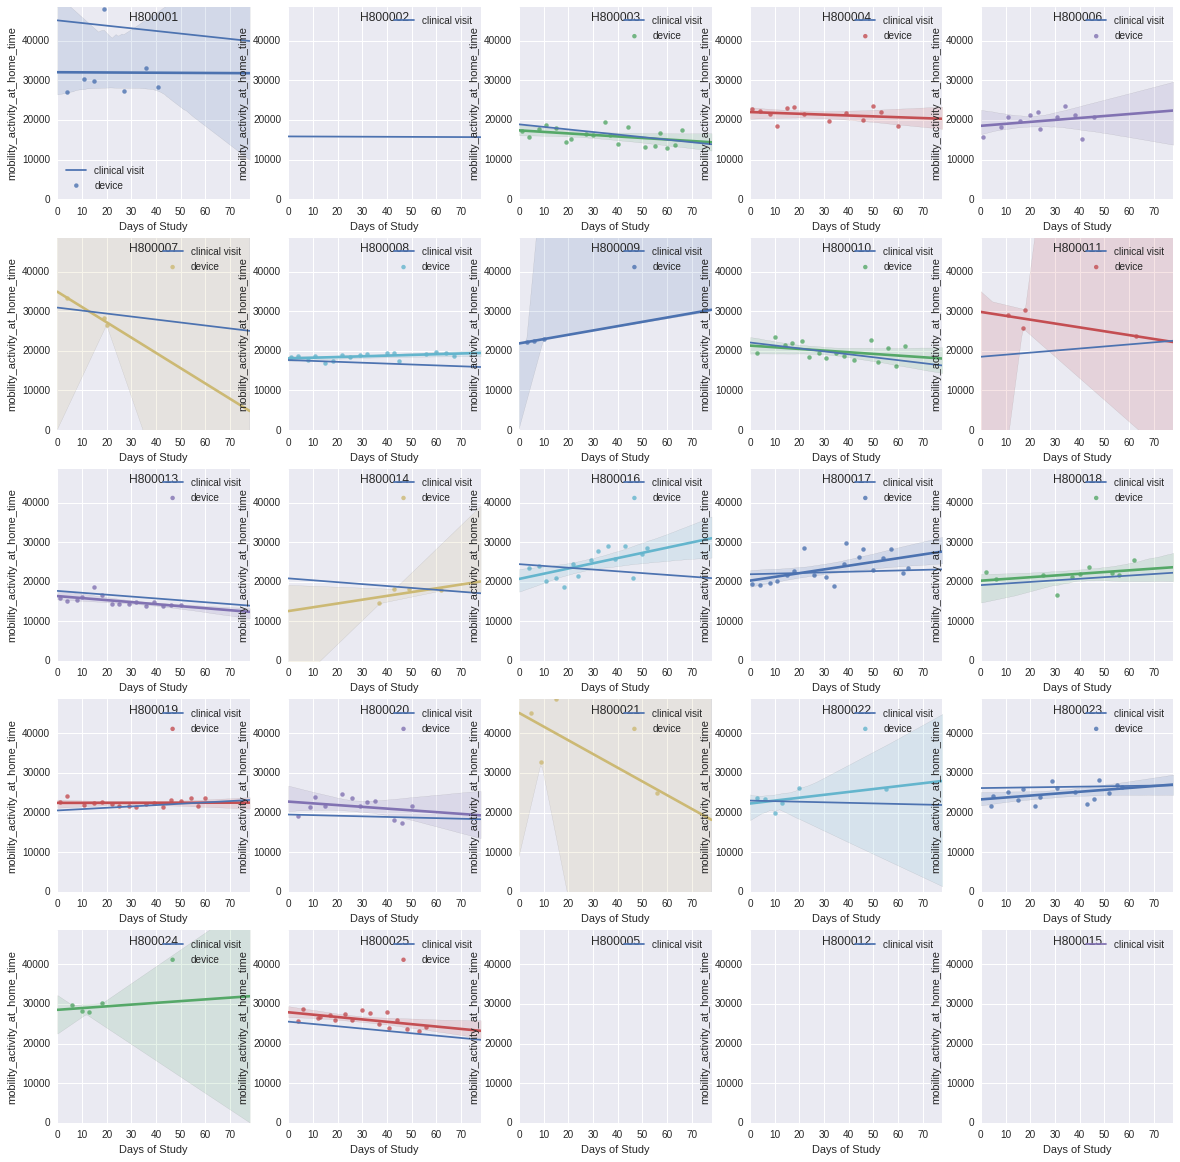

In [182]:
feature = at_home_features_highly_correlated[17]
plot_feature_across_days_and_clinical_visitis(feature)

mean_pvt_delay_1_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


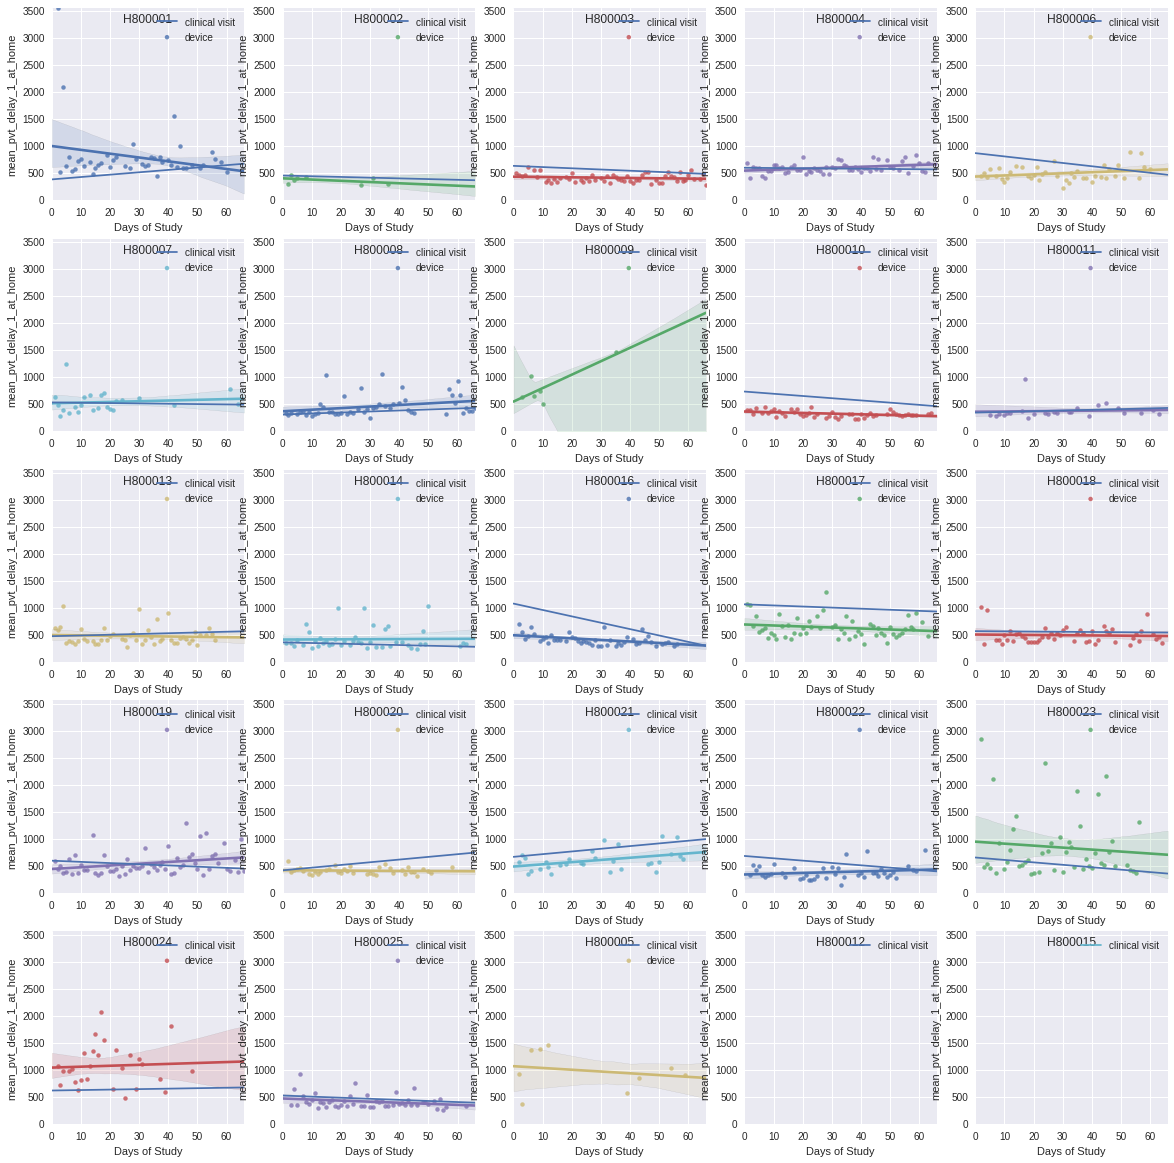

In [183]:
feature = at_home_features_highly_correlated[18]
plot_feature_across_days_and_clinical_visitis(feature)